# Perform Principal component analysis and perform clustering using

first
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
optimum number of clusters and check whether we have obtained same number of clusters with the original data
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded= files.upload()

Saving wine.csv to wine.csv


In [5]:
wine= pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.shape

(178, 14)

In [7]:
wine["Type"].unique()

array([1, 2, 3])

In [8]:
wine.drop("Type",axis=1)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [12]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [13]:
wine.duplicated().sum()

0

Data visualisation

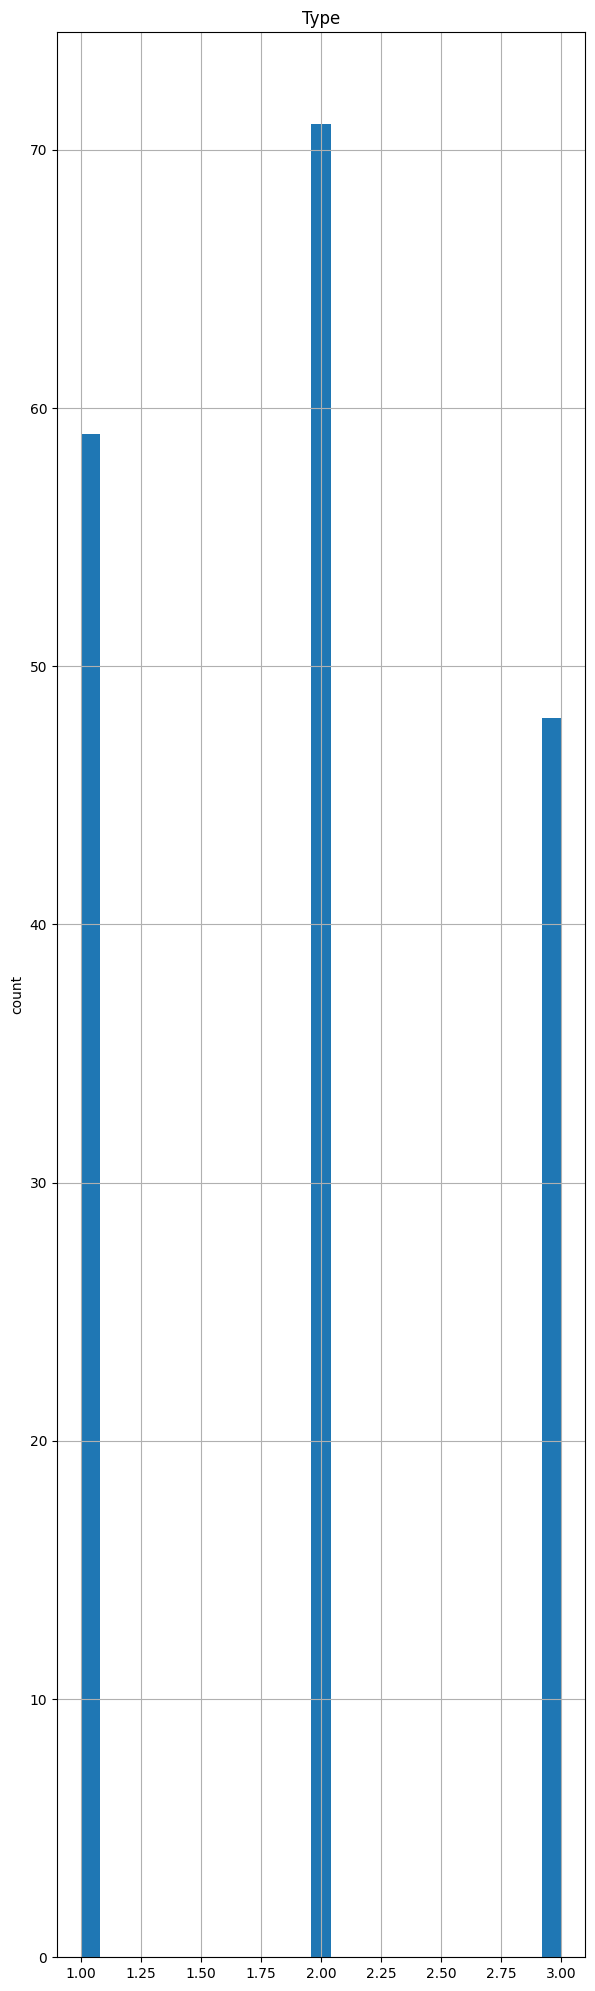

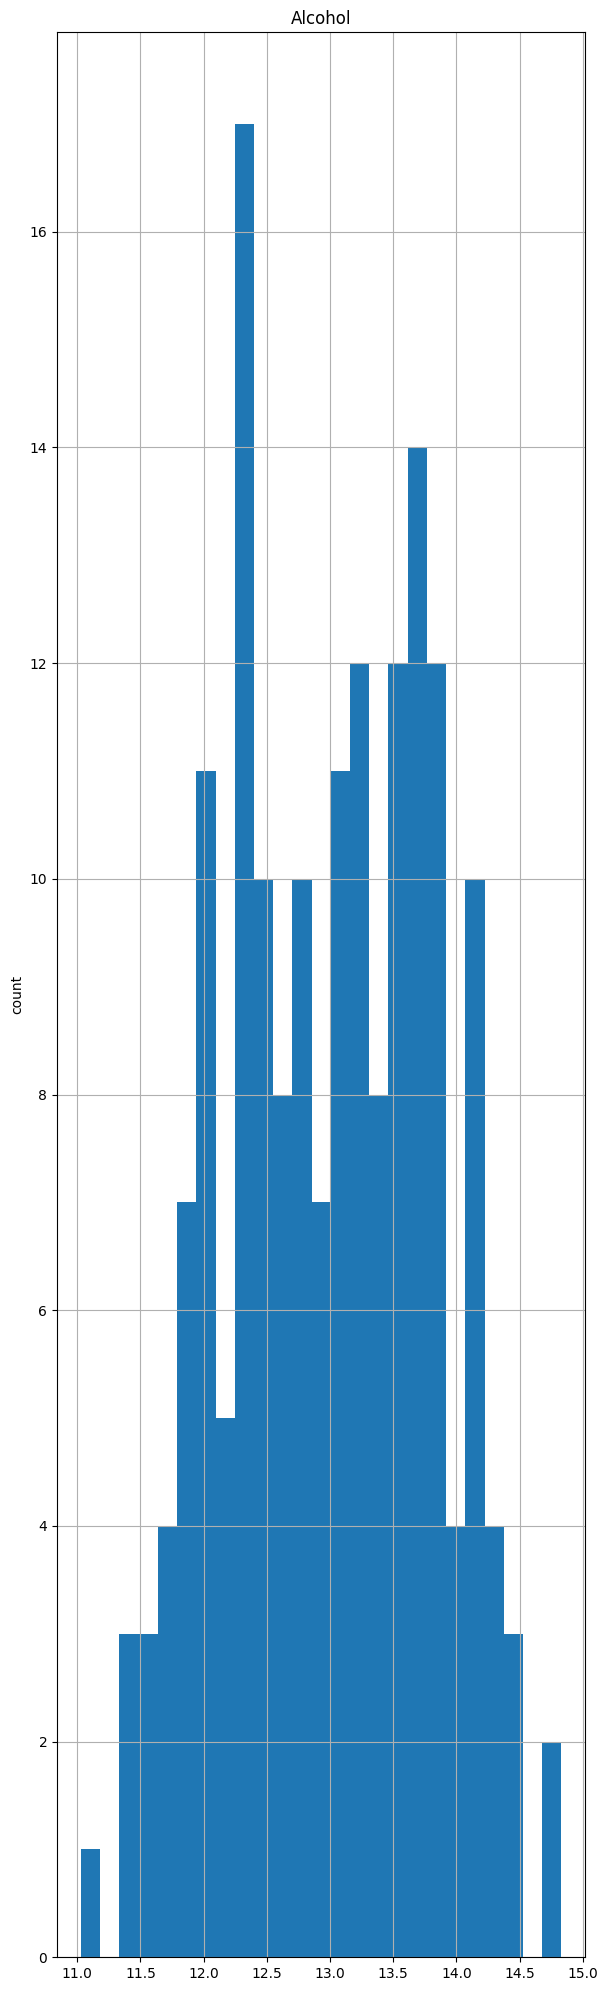

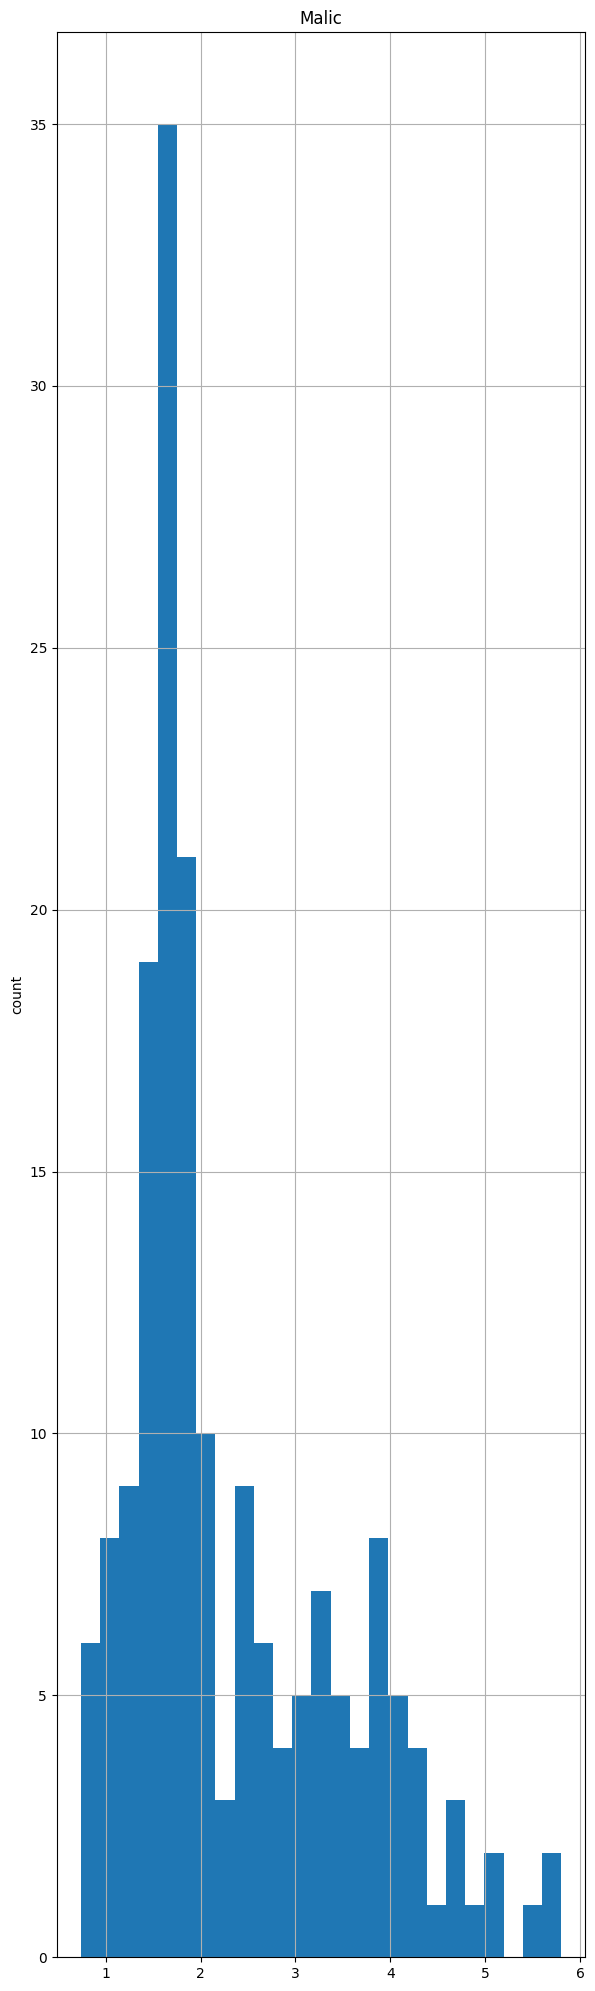

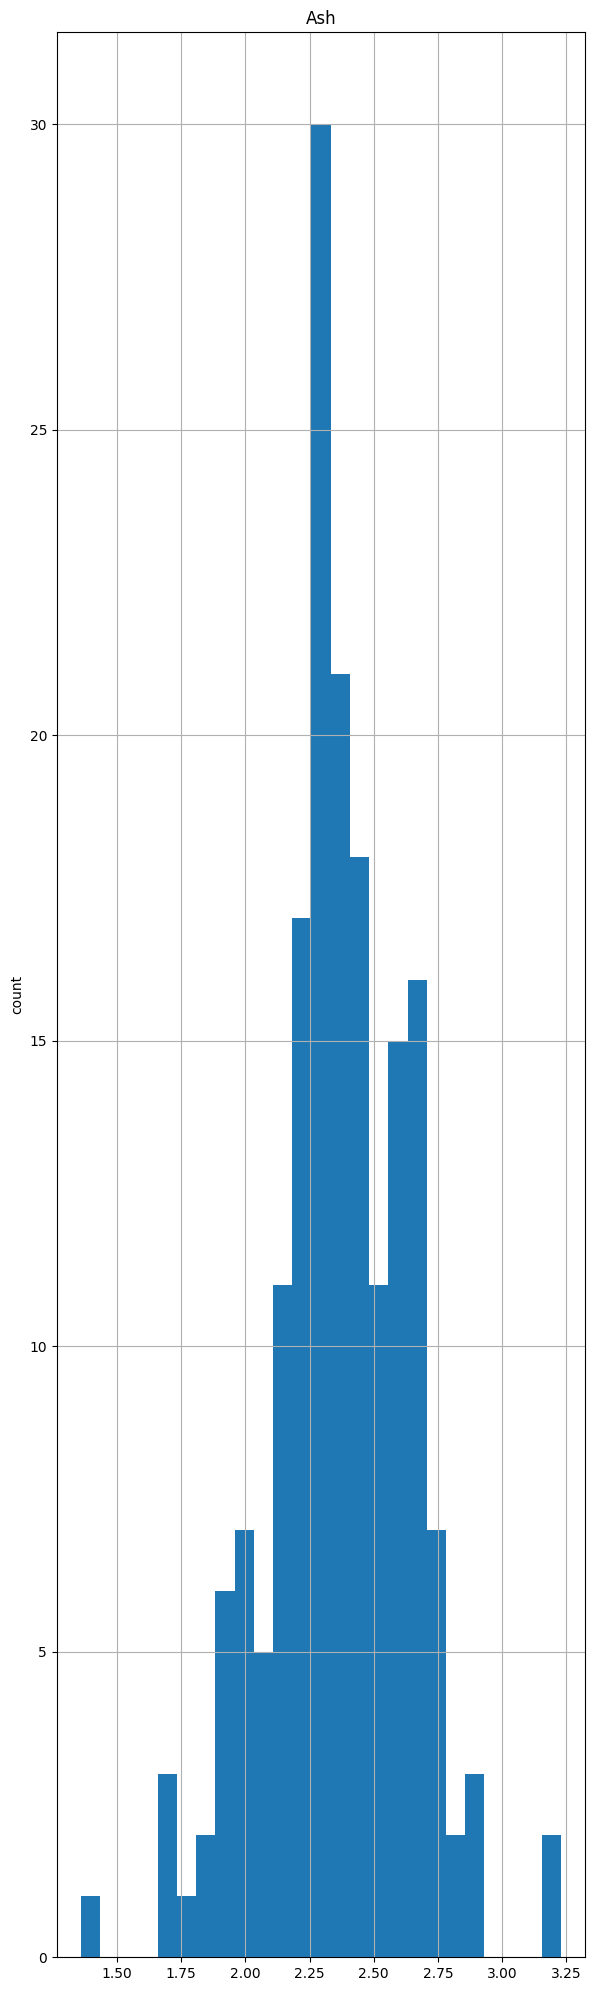

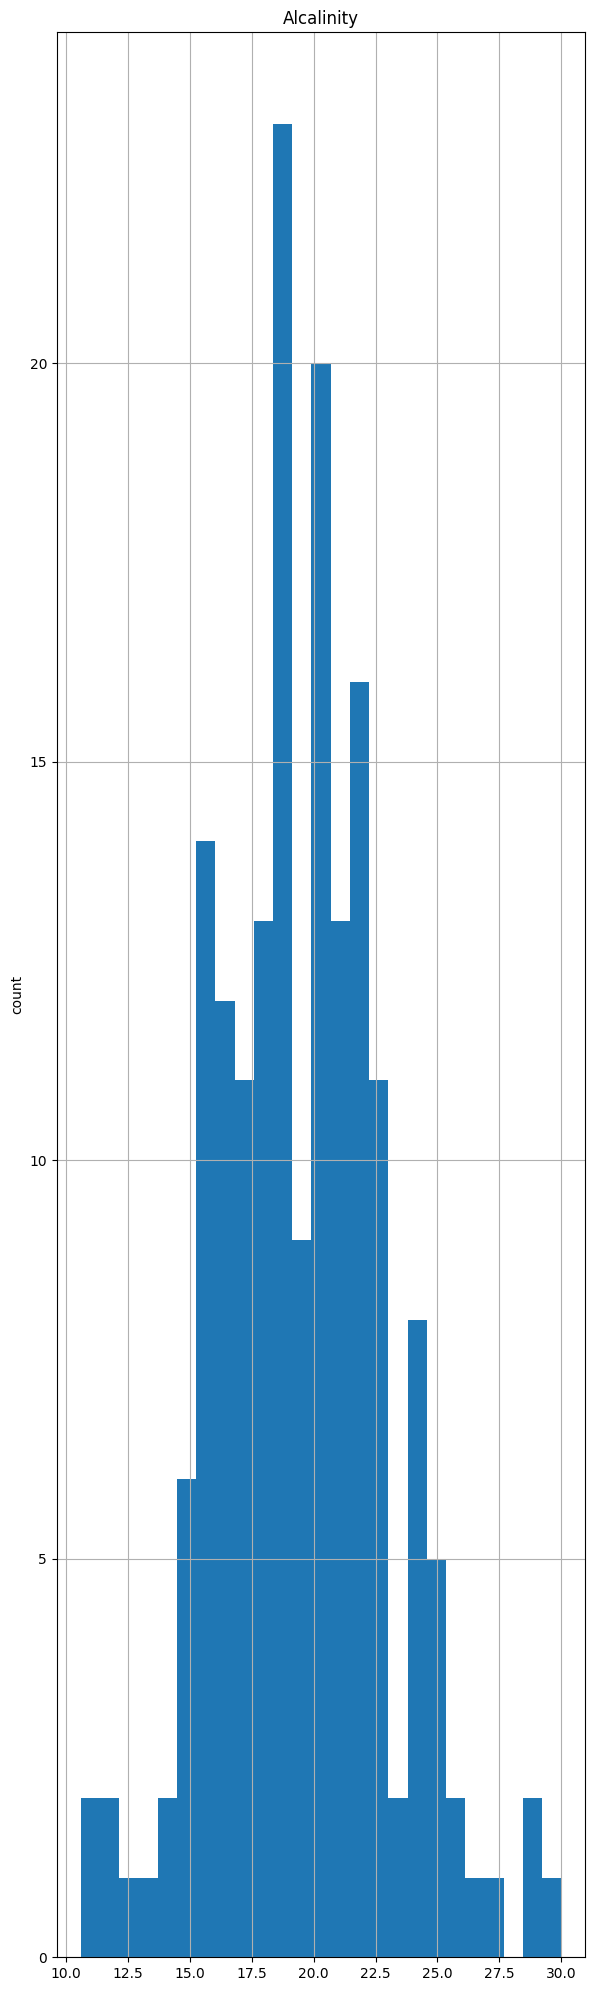

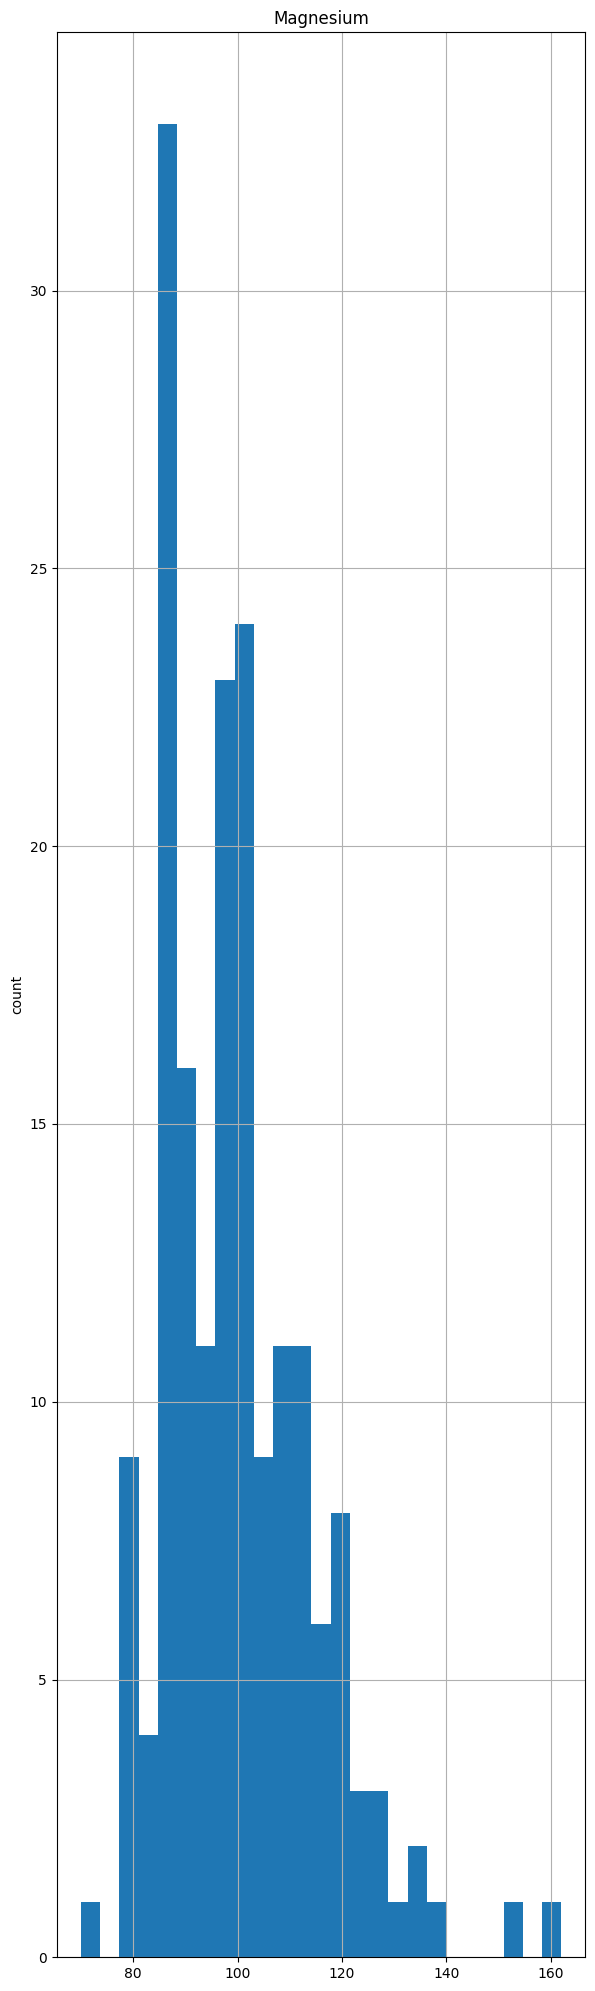

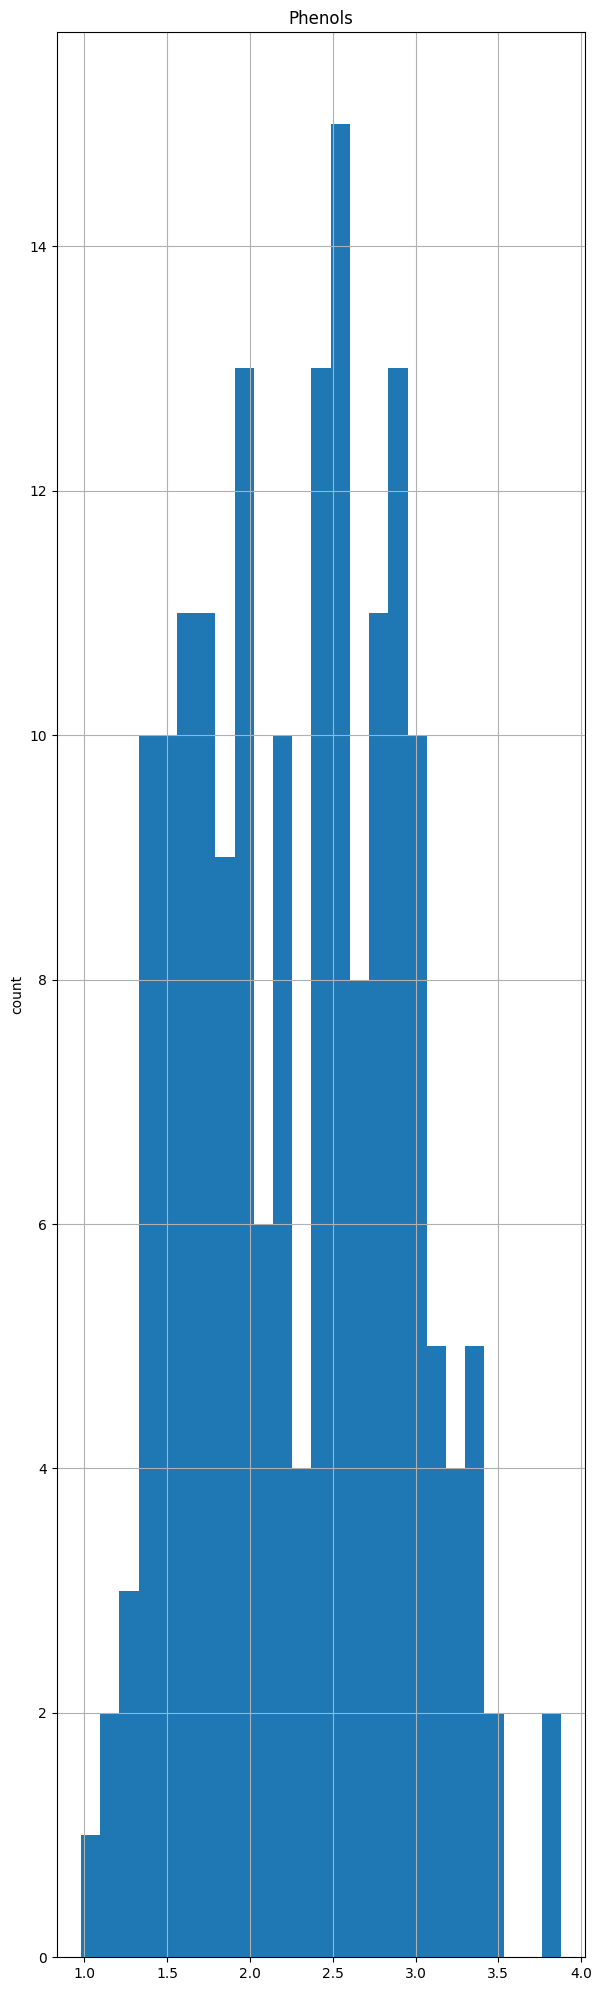

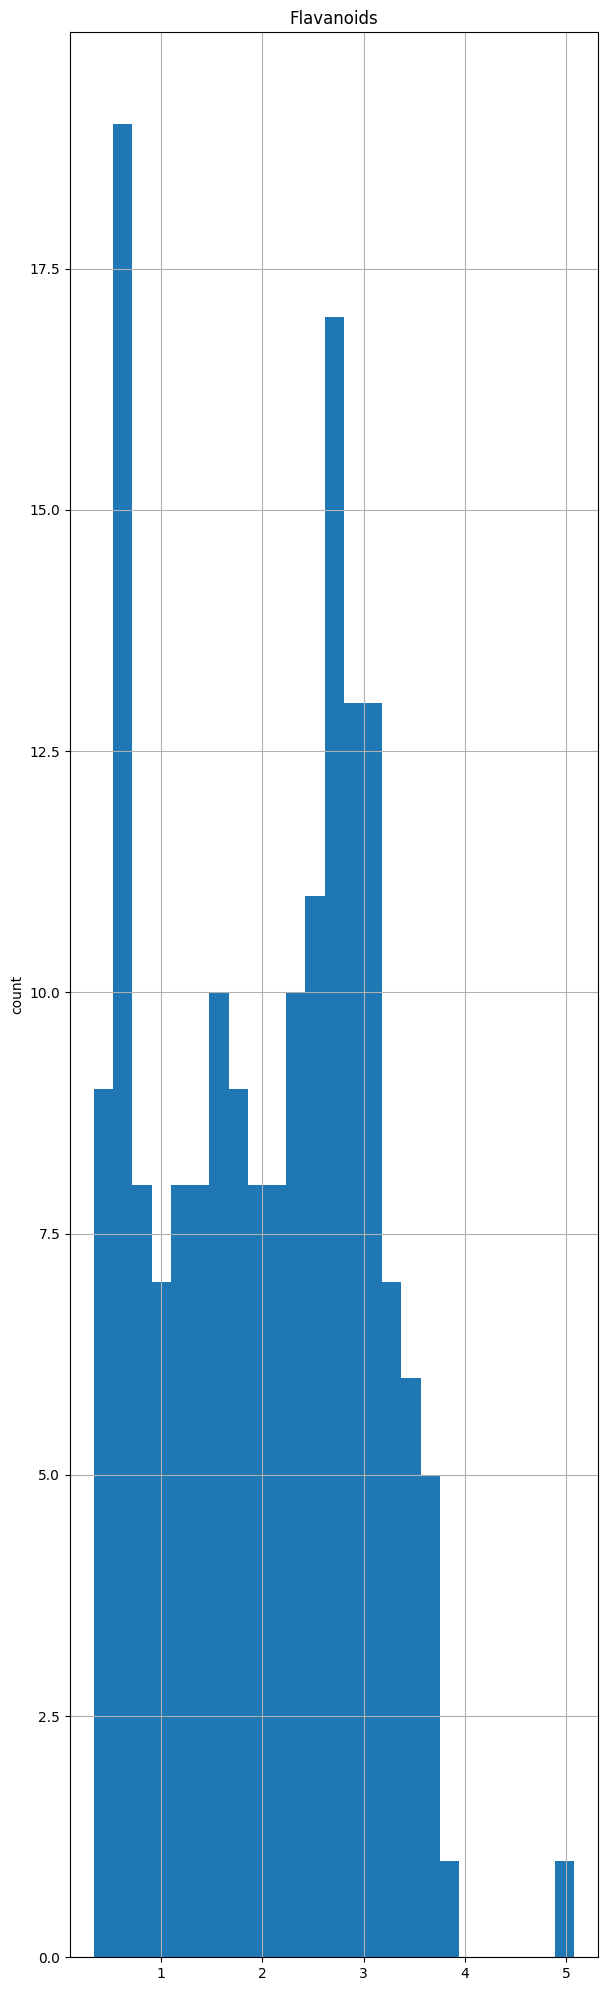

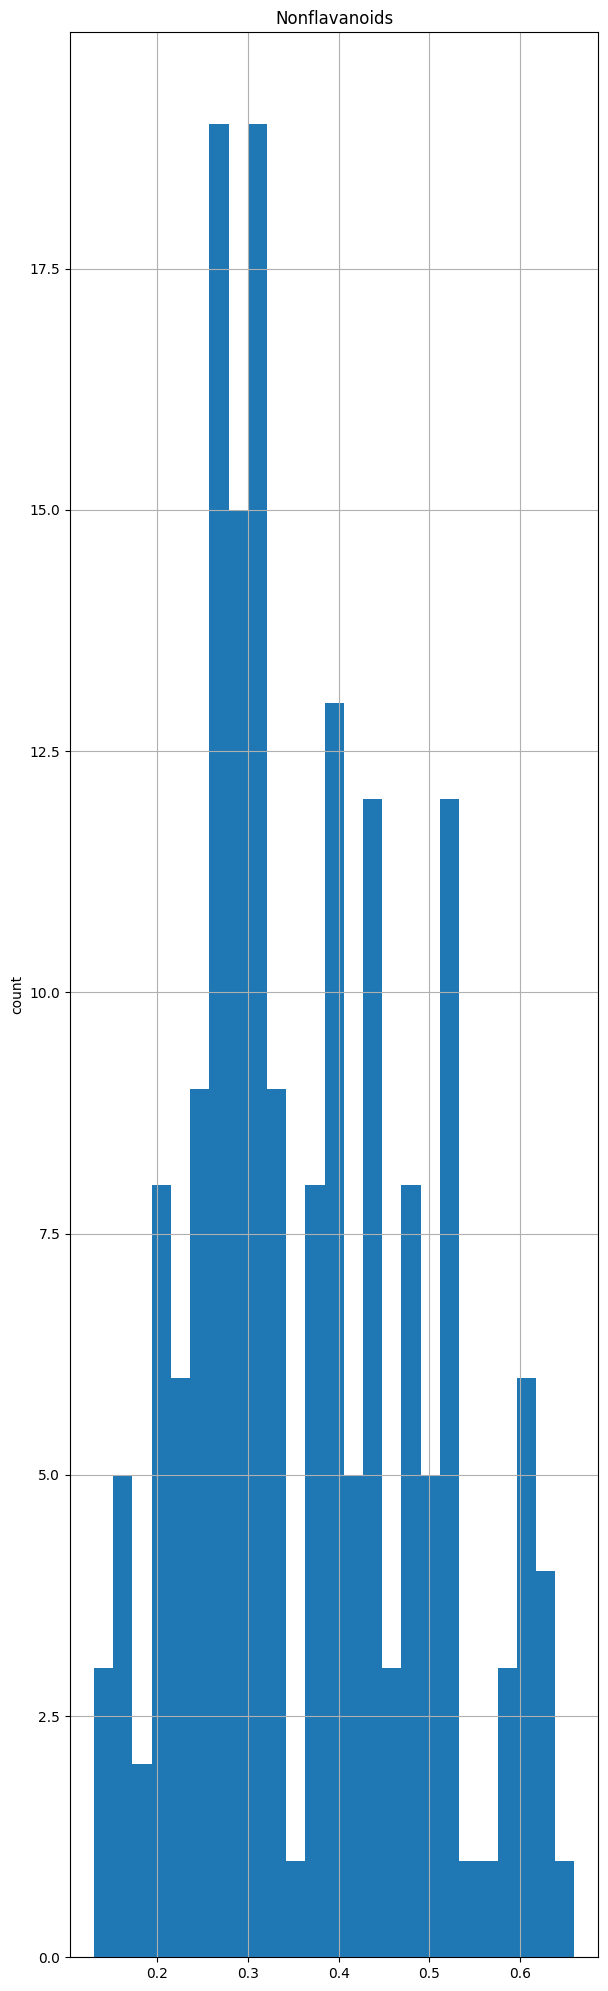

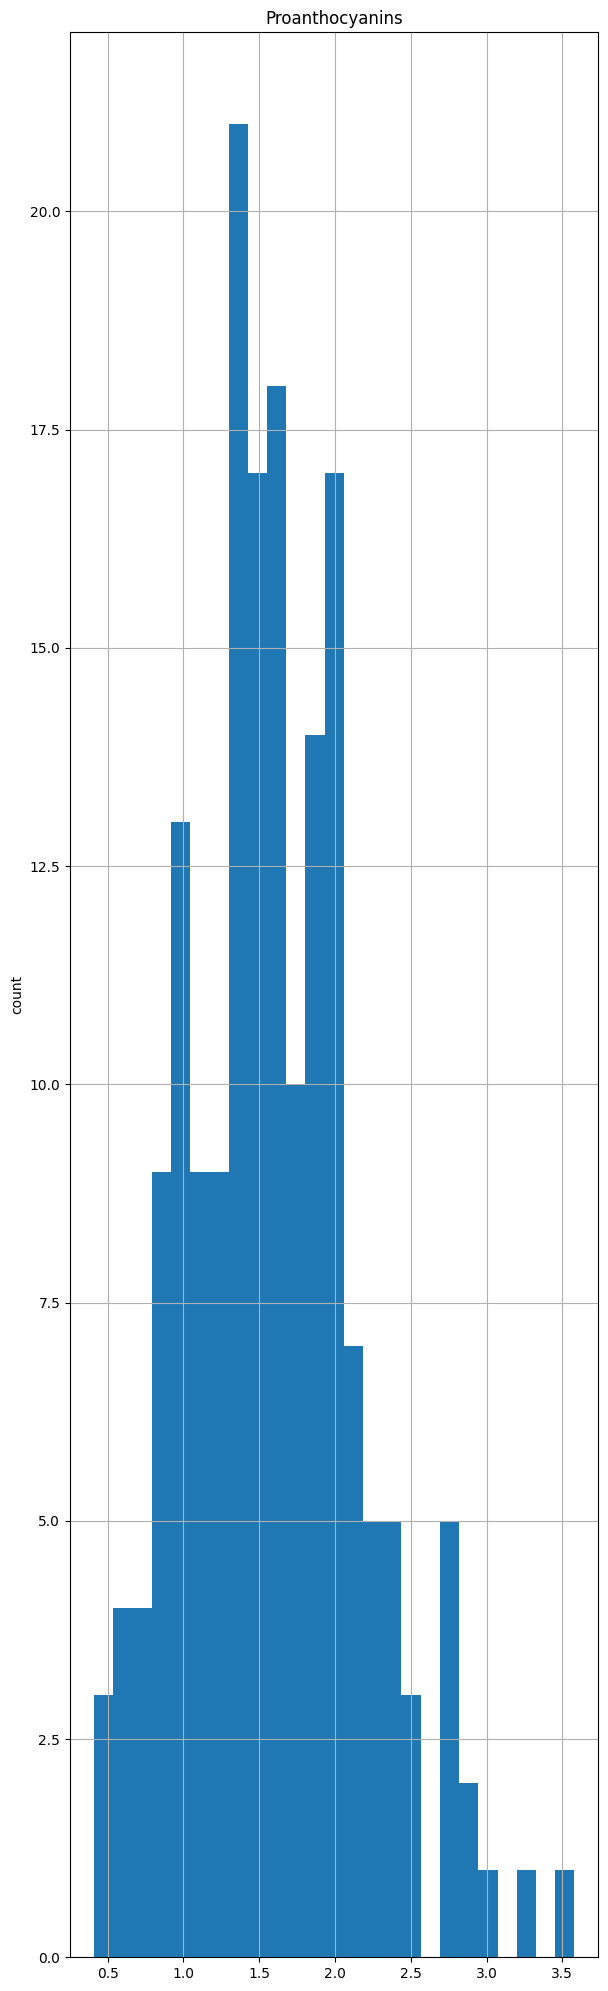

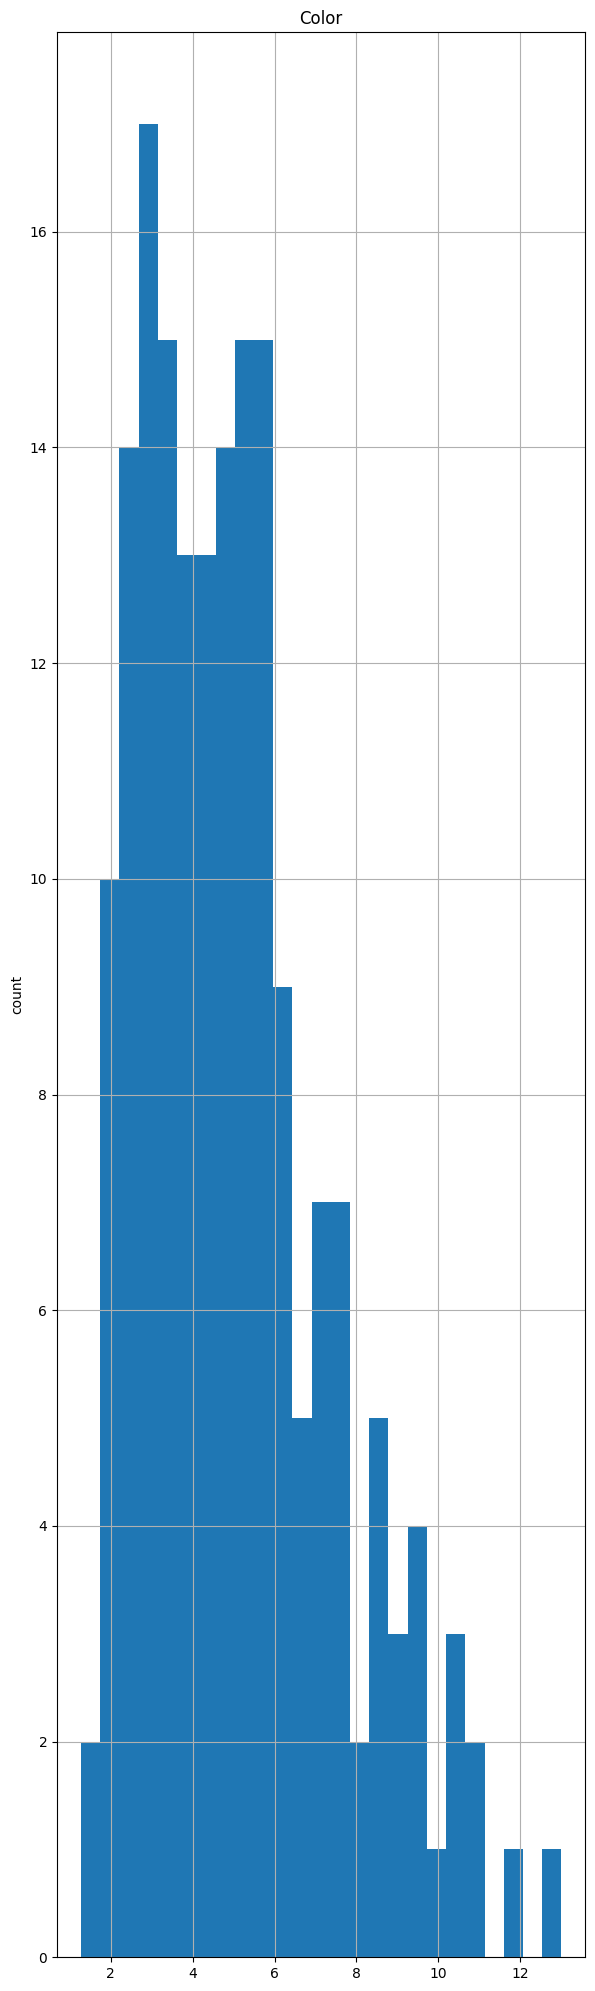

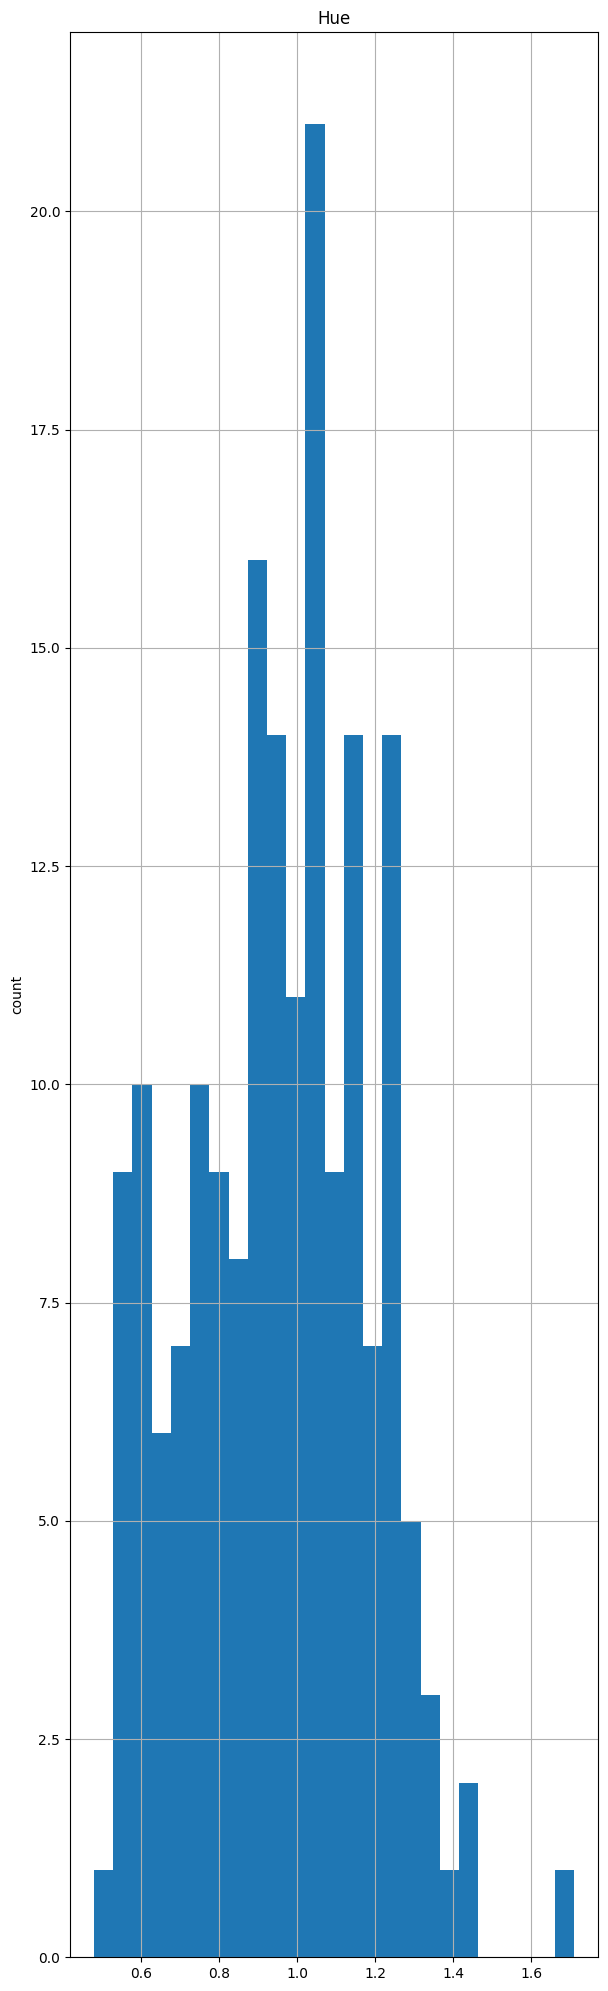

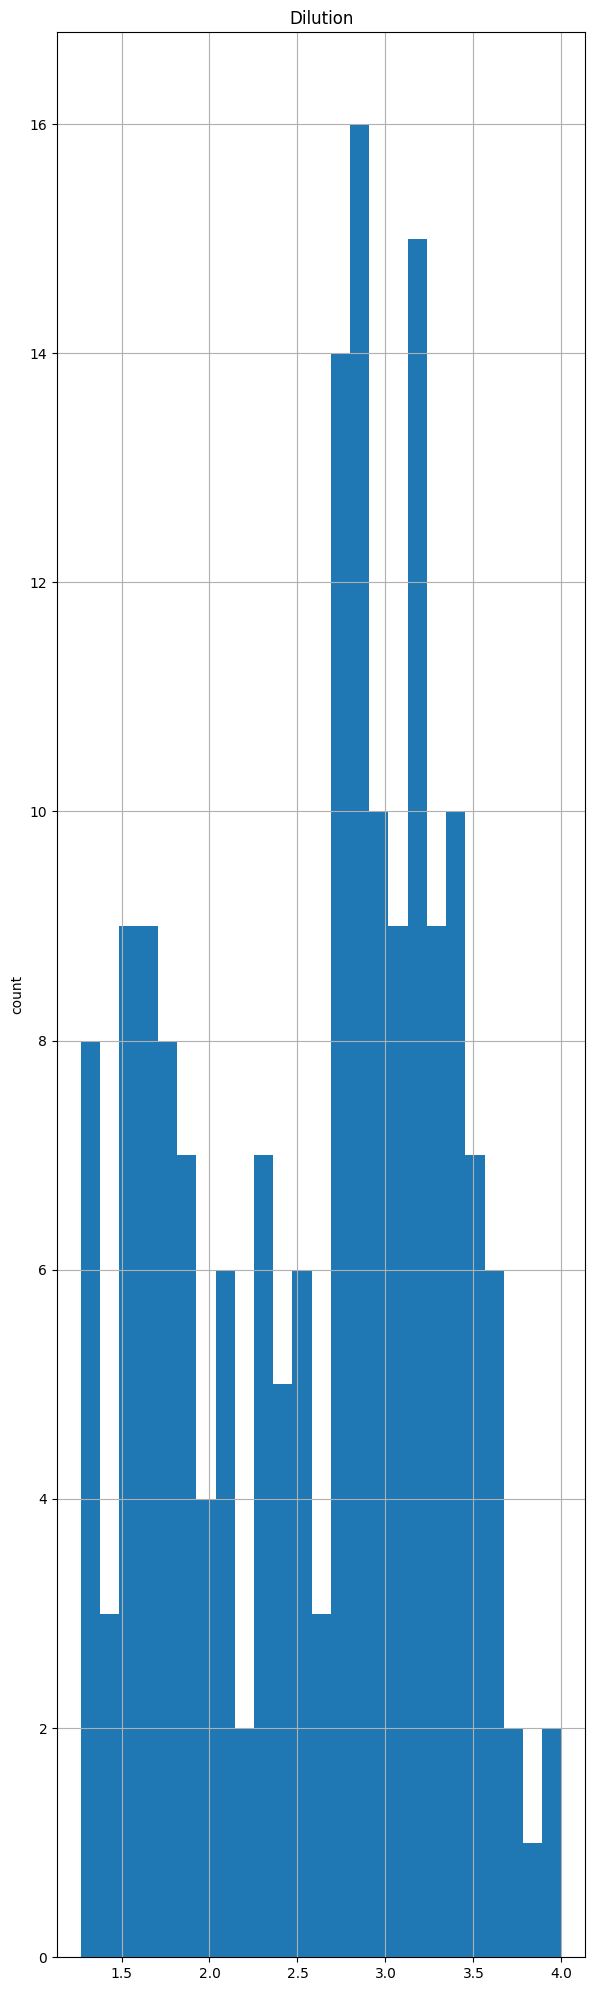

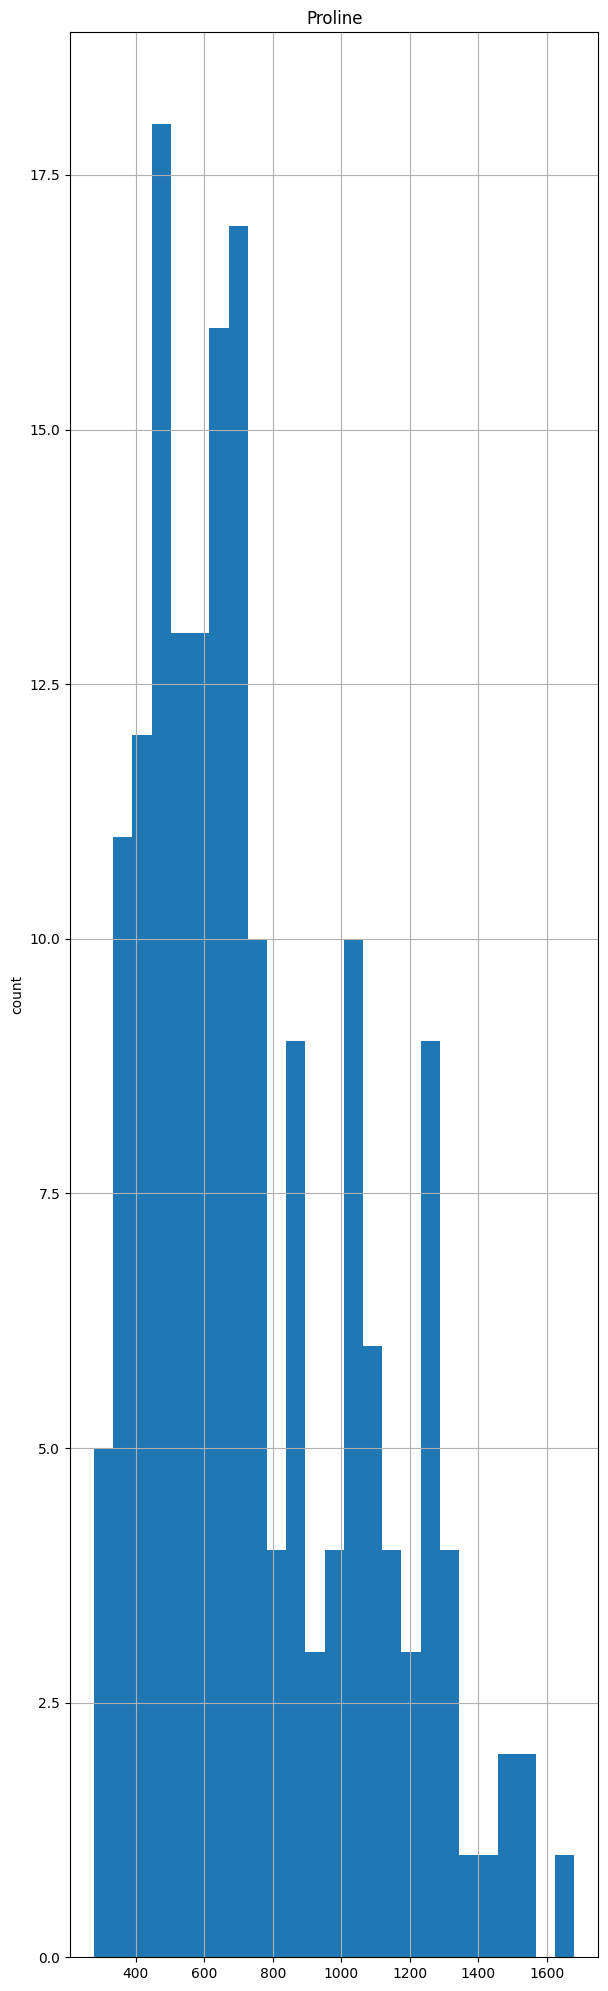

In [14]:
for feature in wine.columns:
  plt.figure(figsize=(15,25))
  plt.subplot(1,2,1)
  wine[feature].hist(bins=25)
  plt.ylabel("count")
  plt.title(feature)

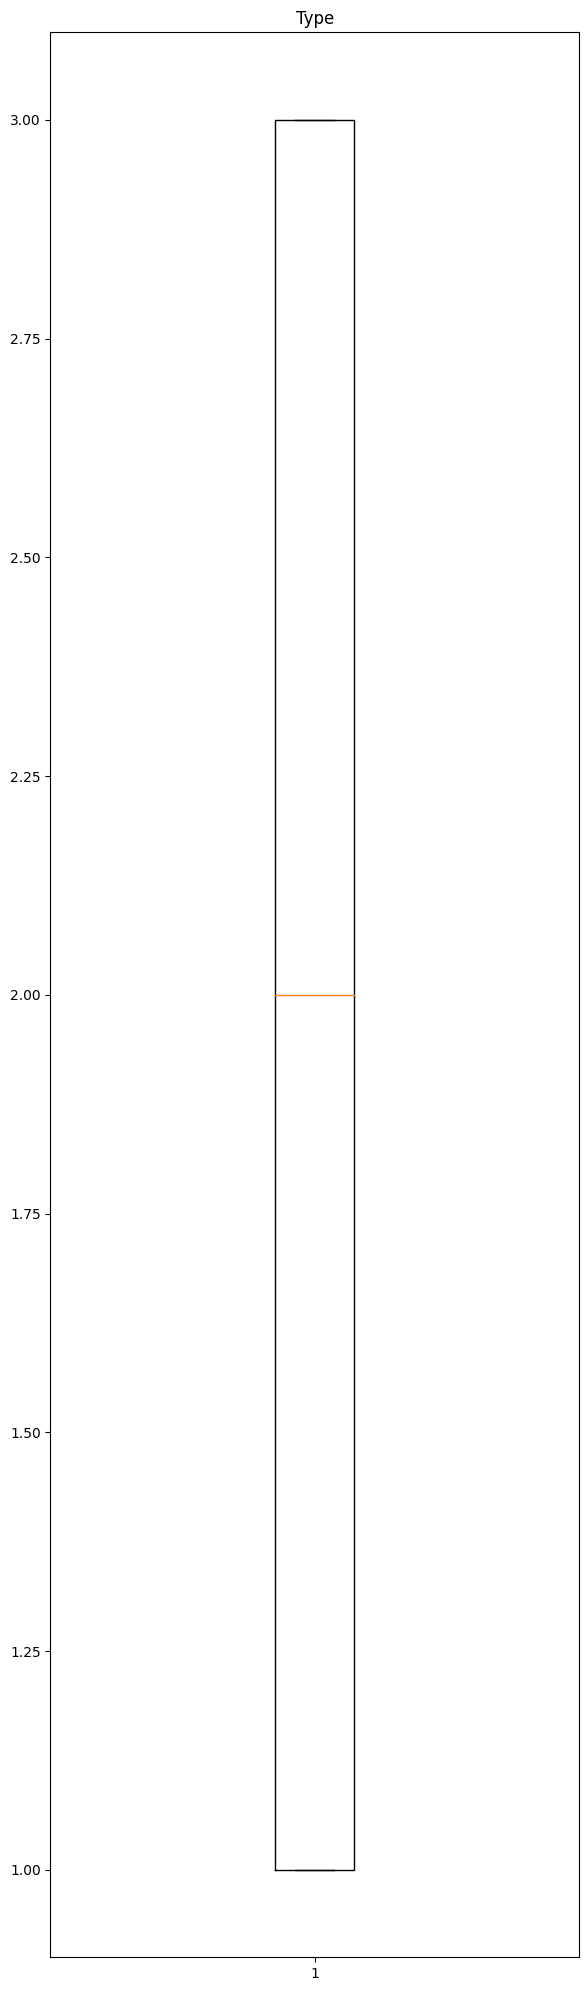

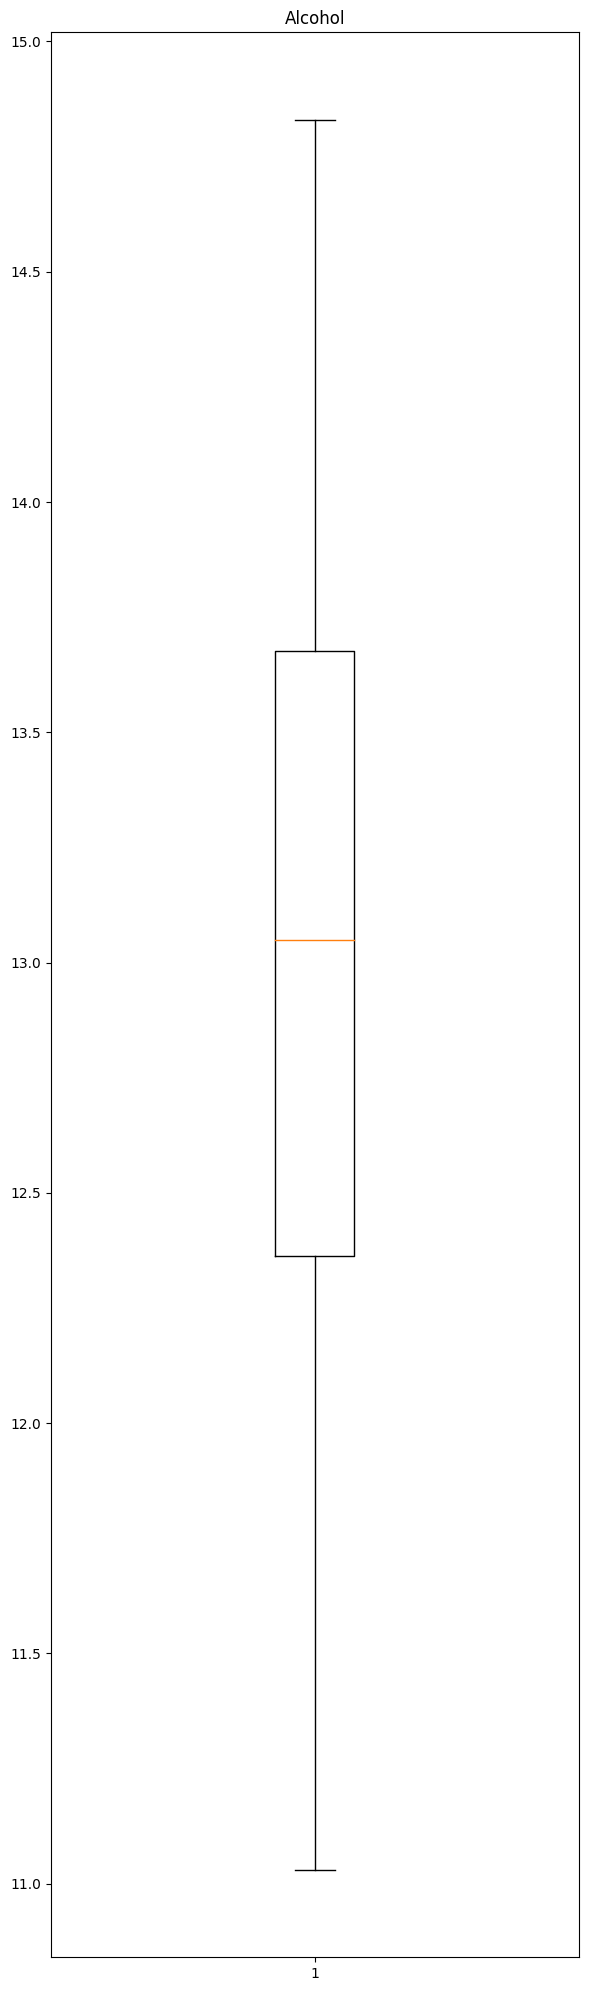

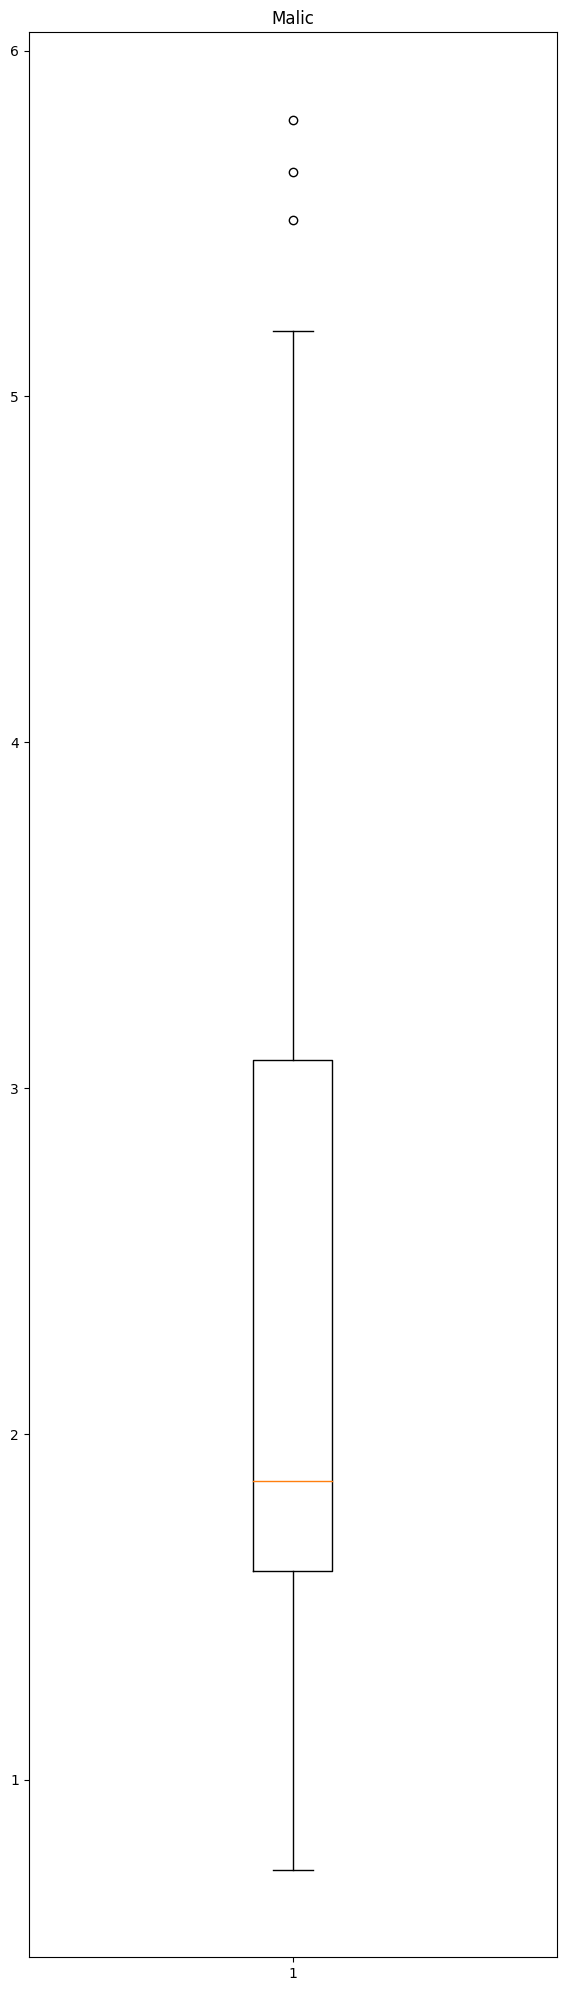

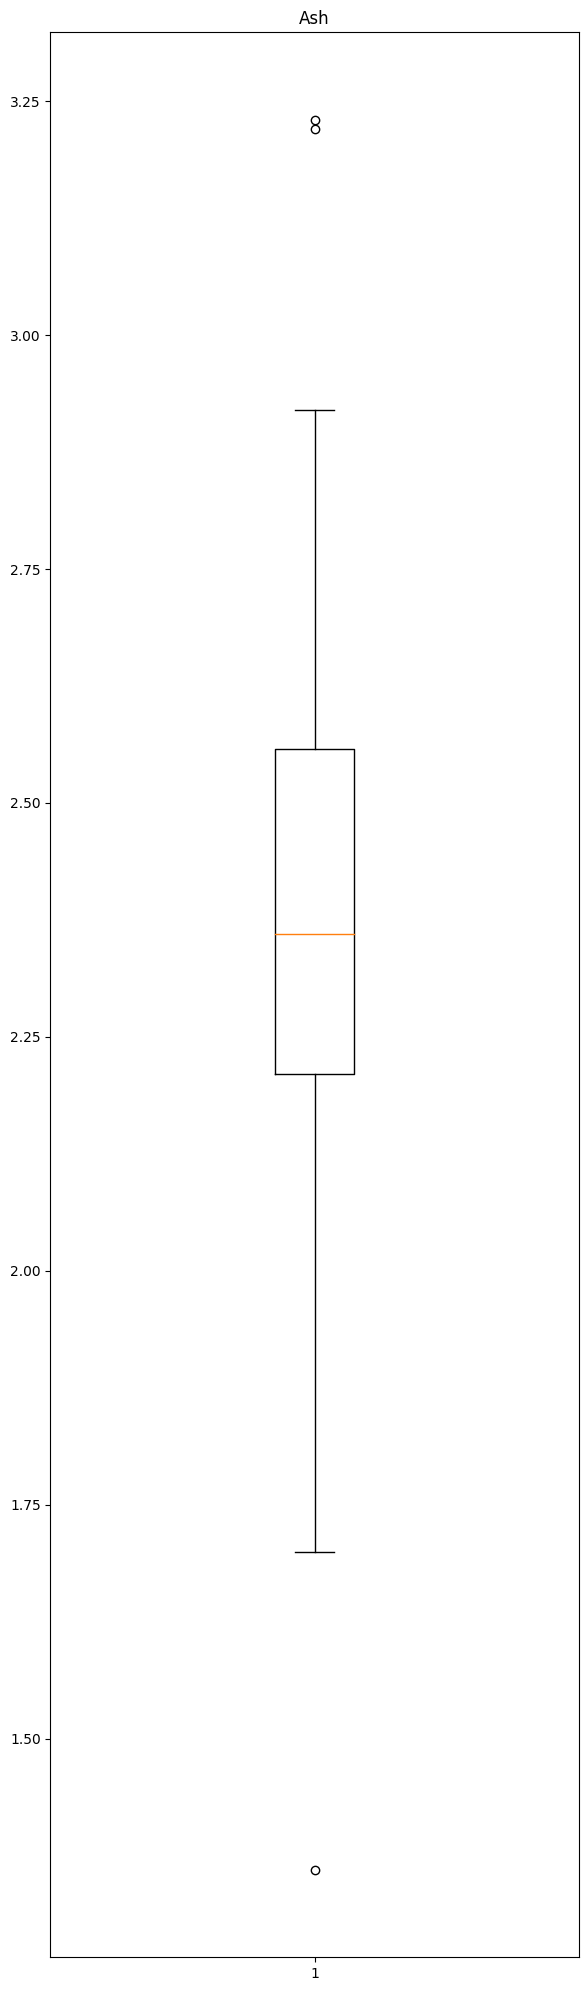

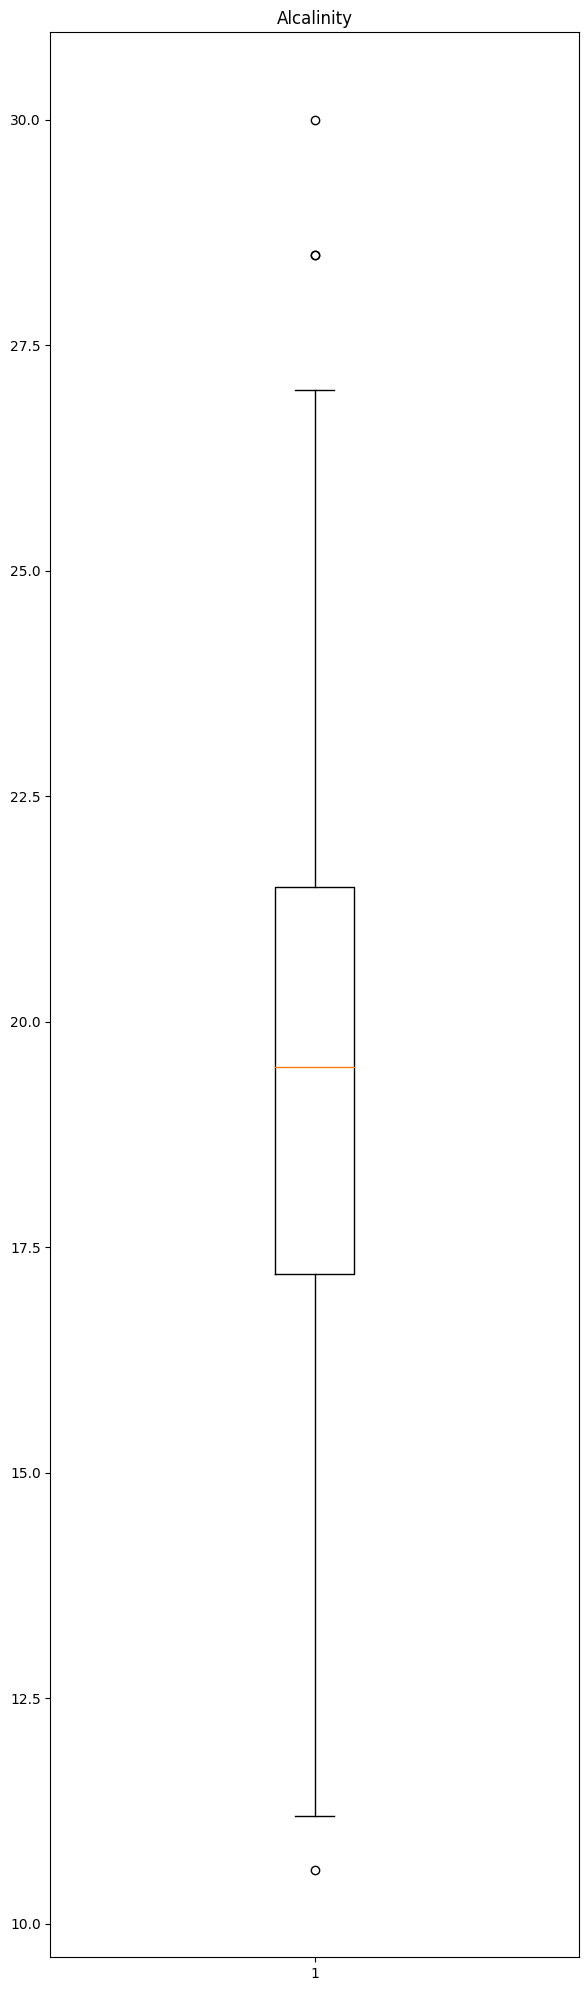

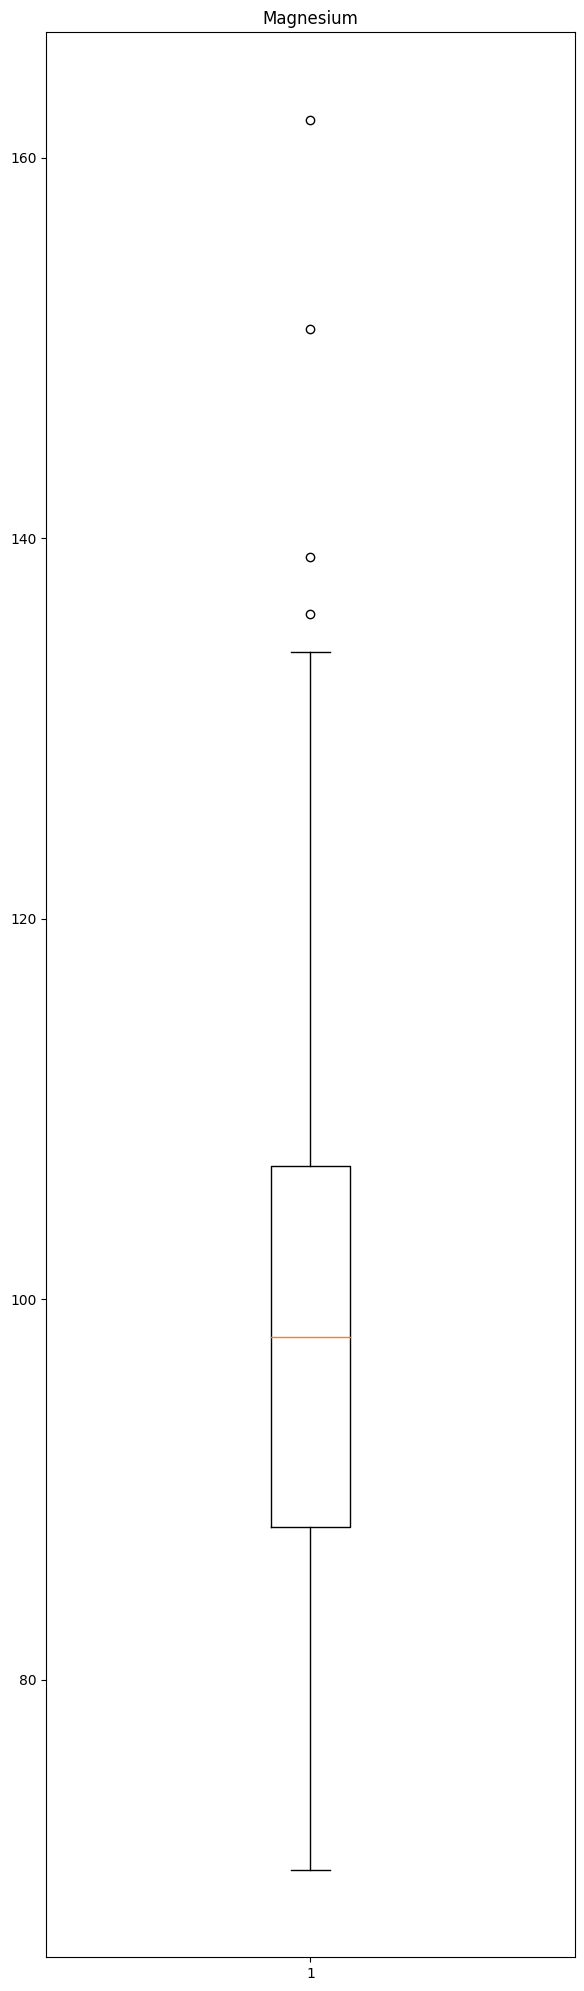

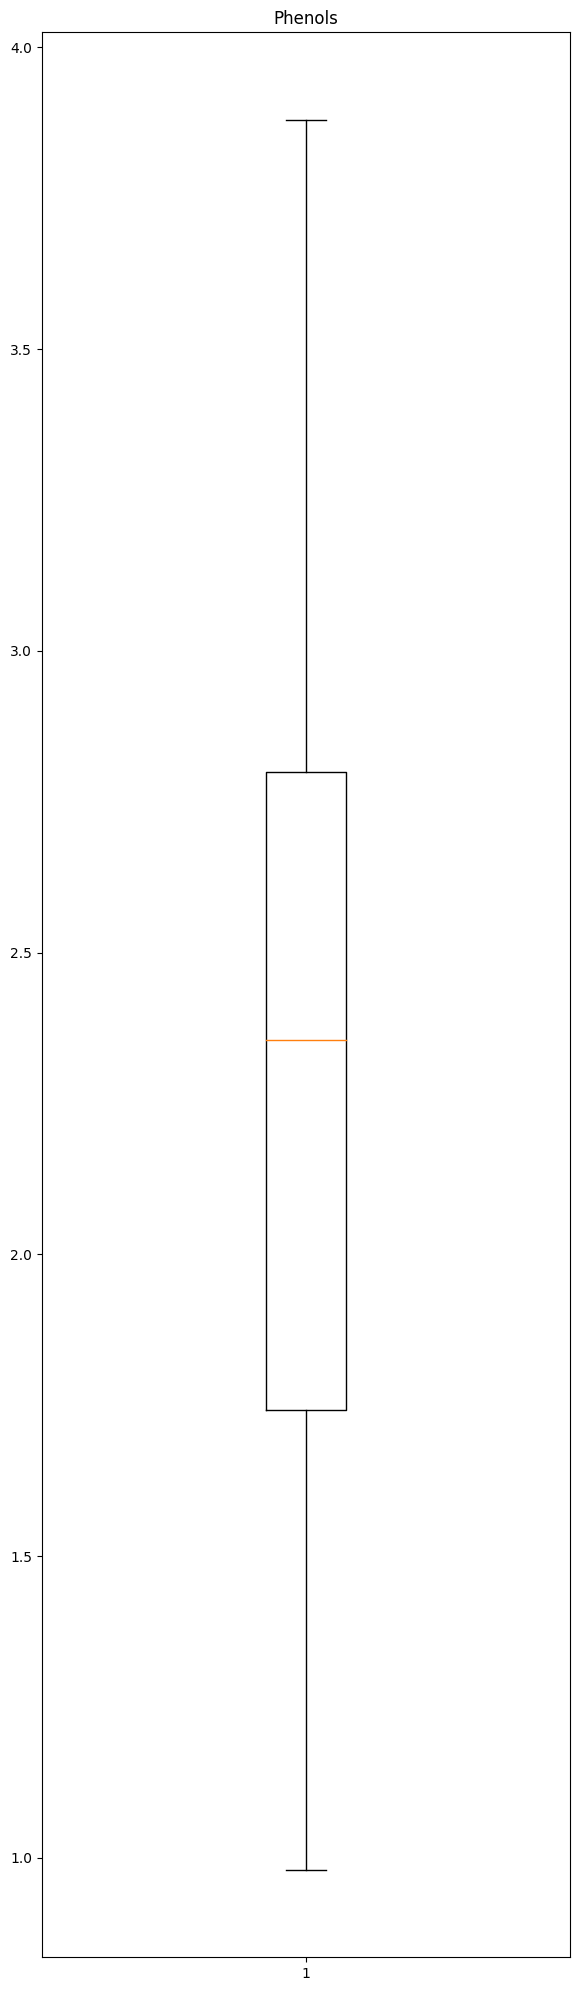

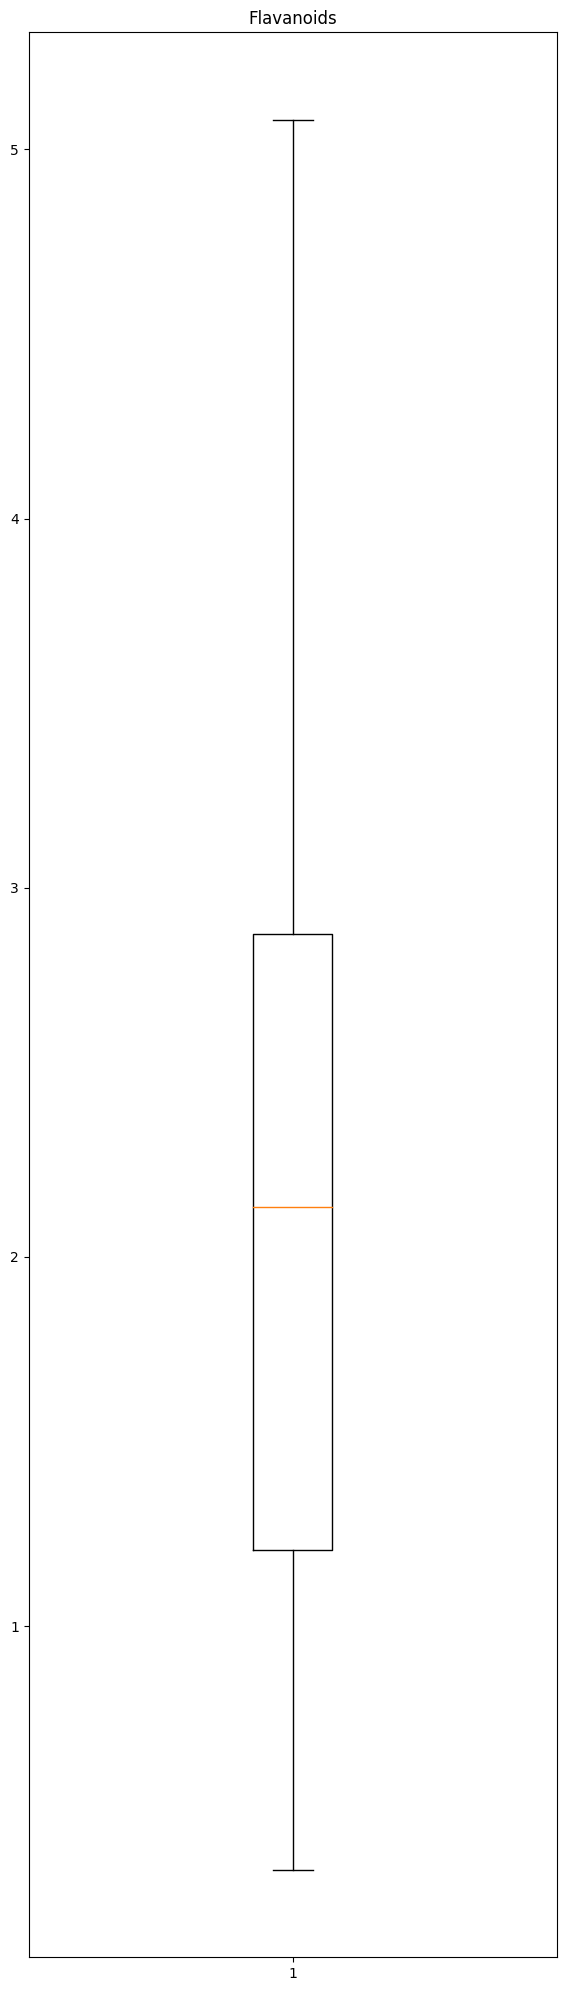

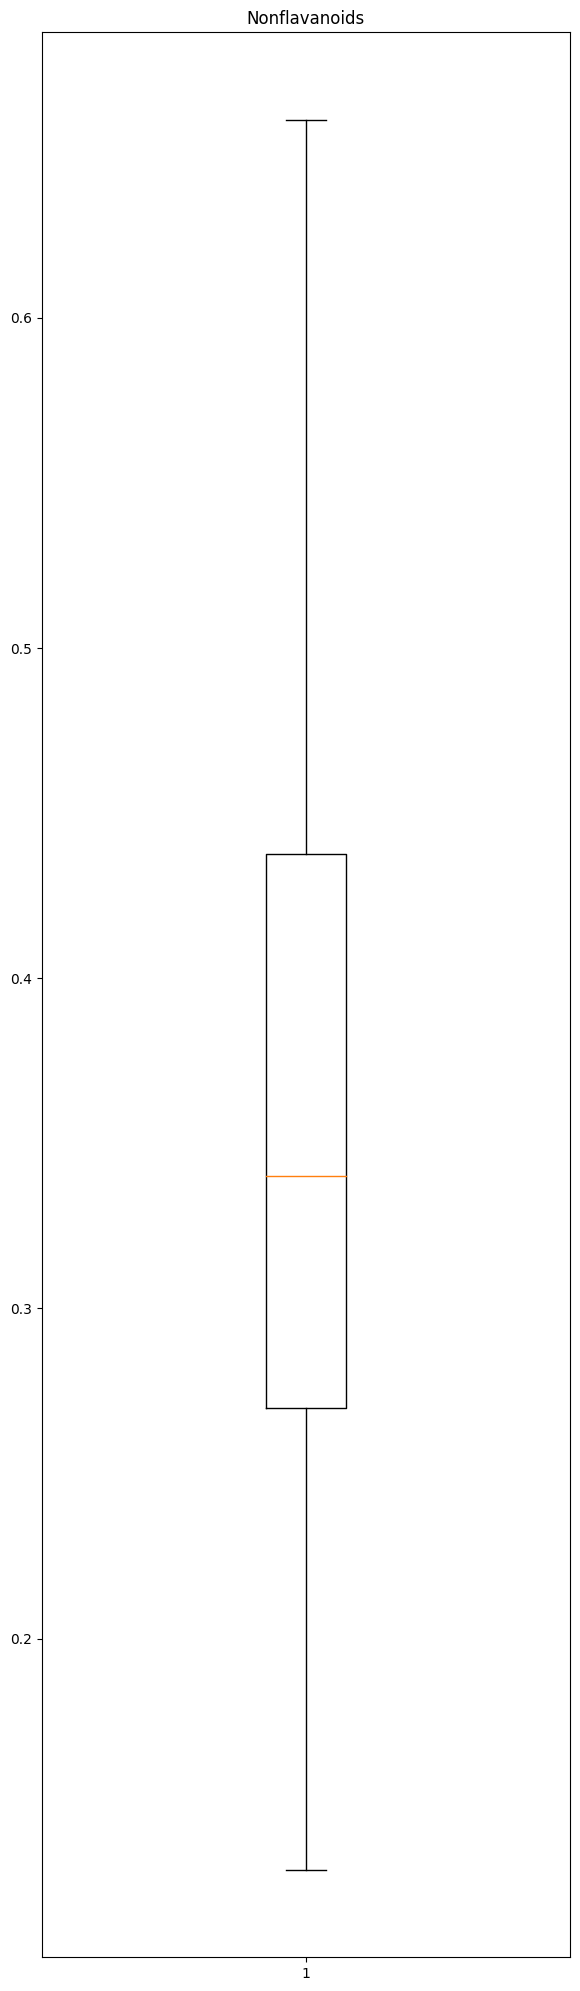

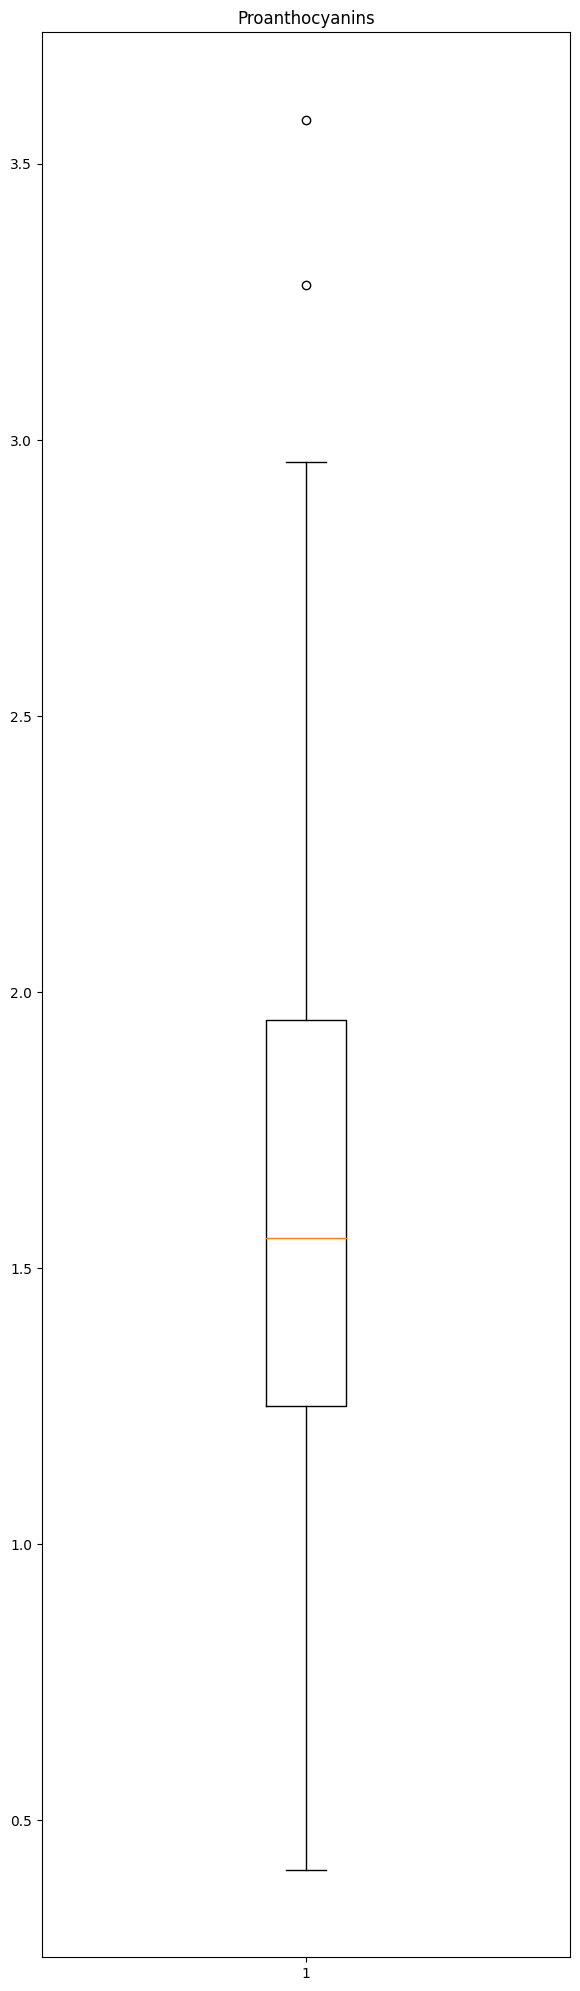

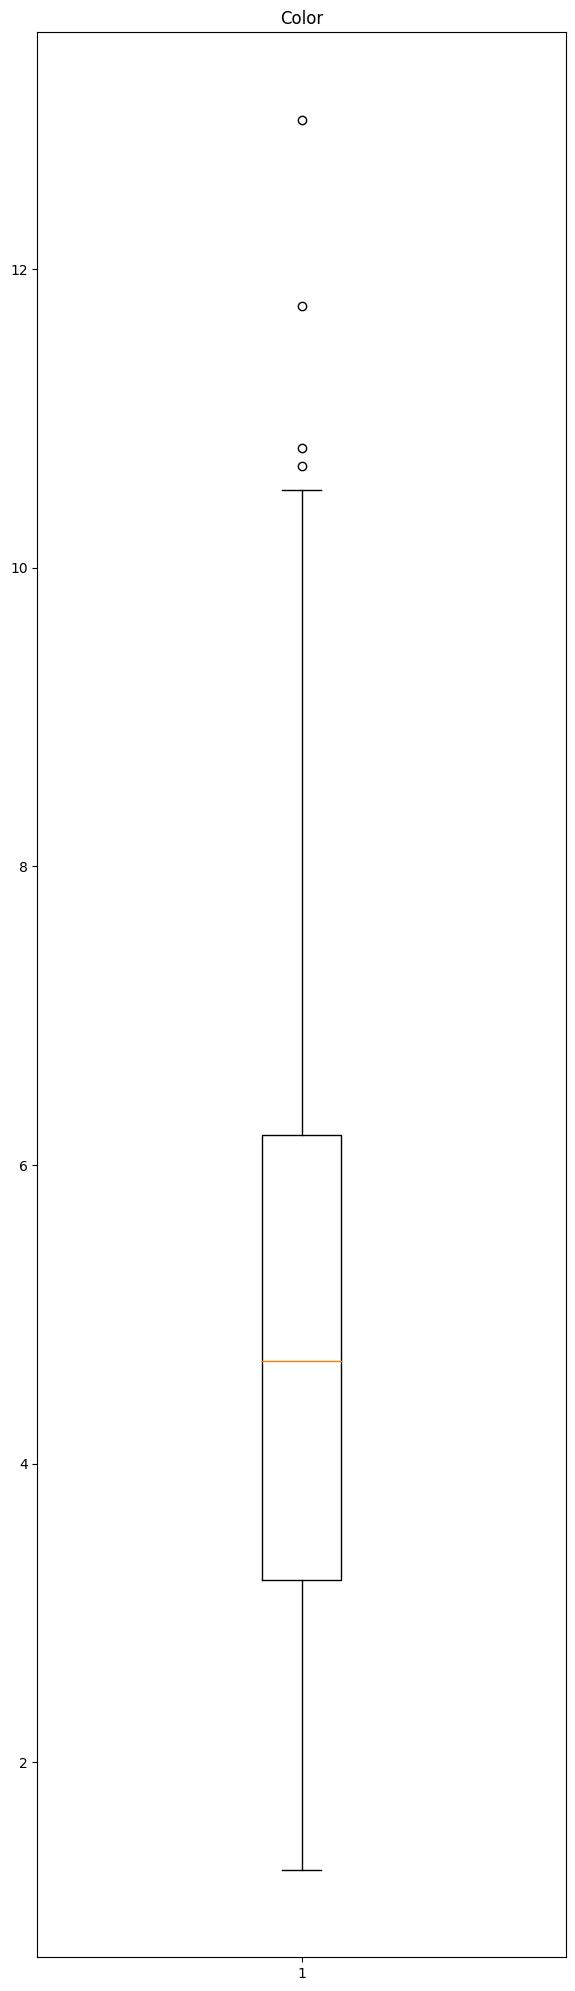

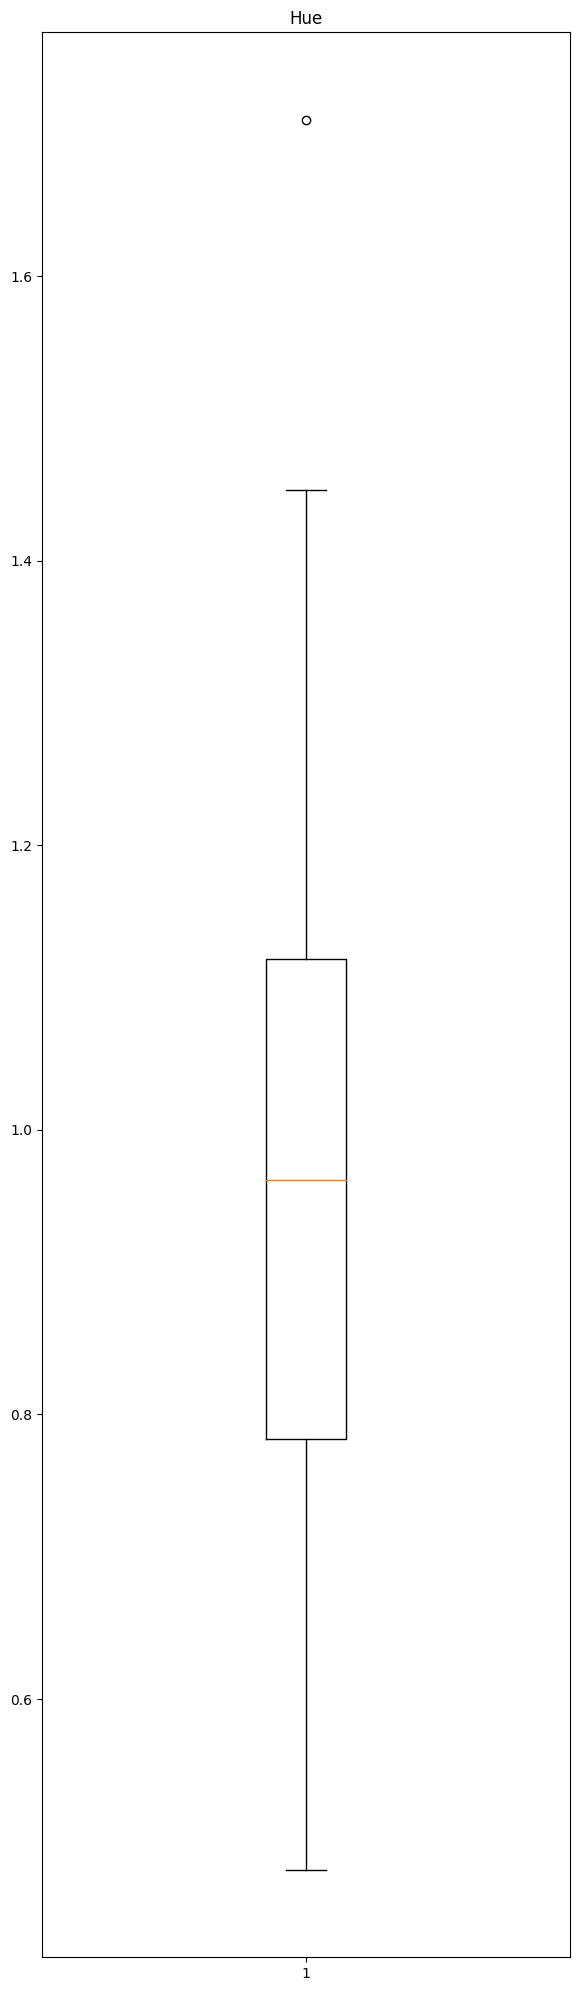

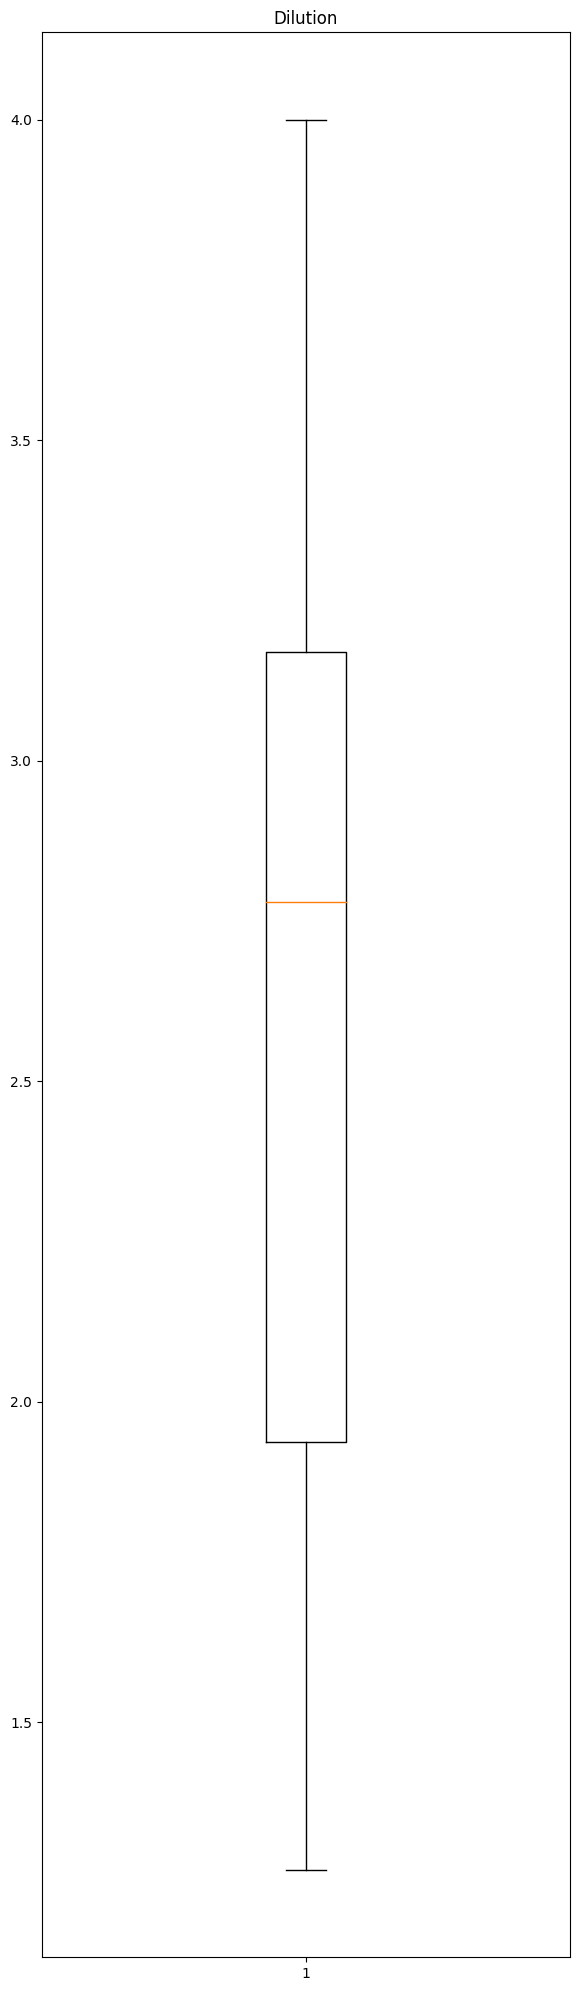

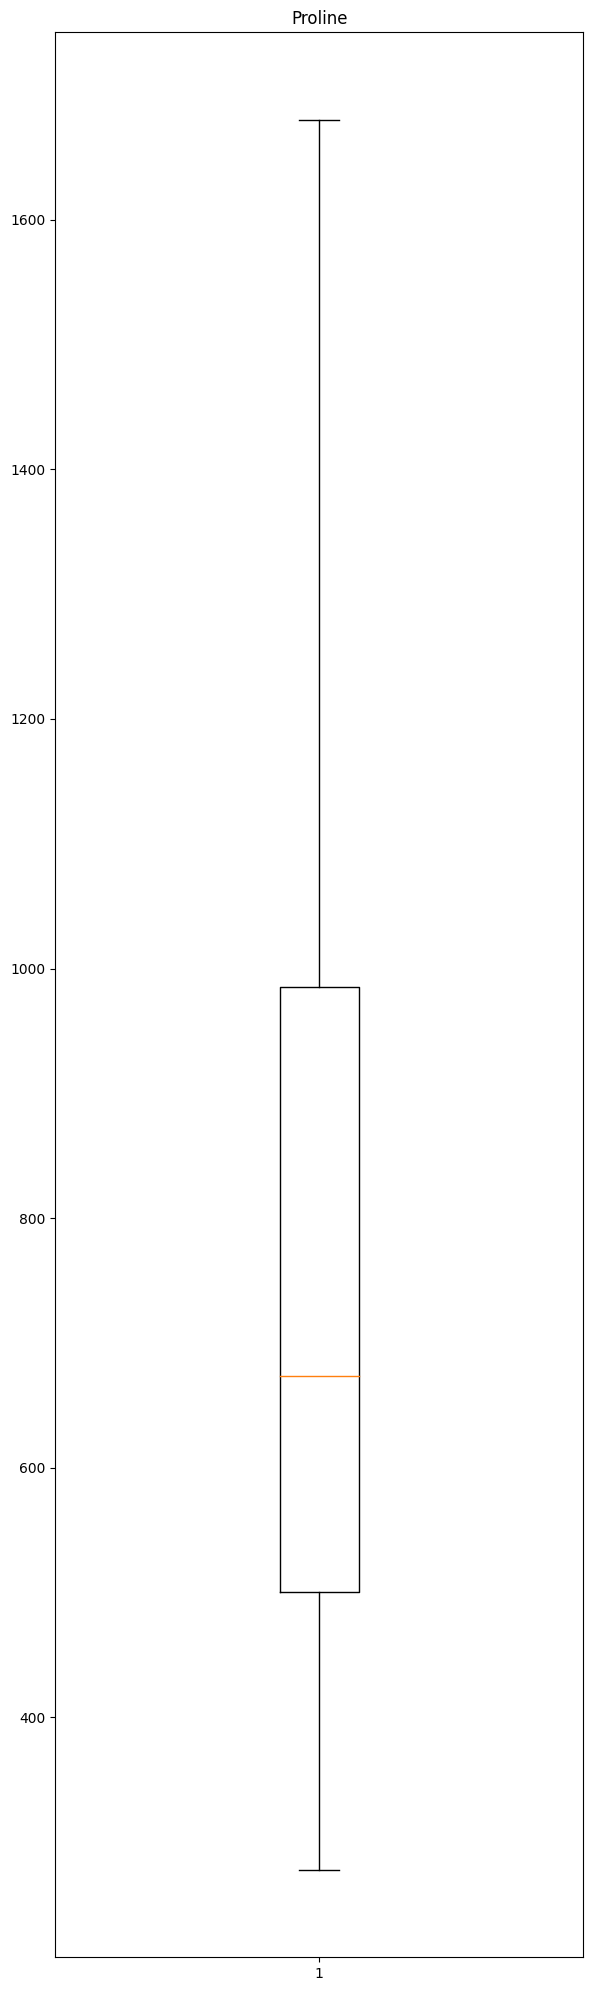

In [15]:
for feature in wine.columns:
  plt.figure(figsize=(15,25))

  plt.subplot(1,2,2)
  plt.boxplot(wine[feature])
  plt.title(feature)
  plt.show()

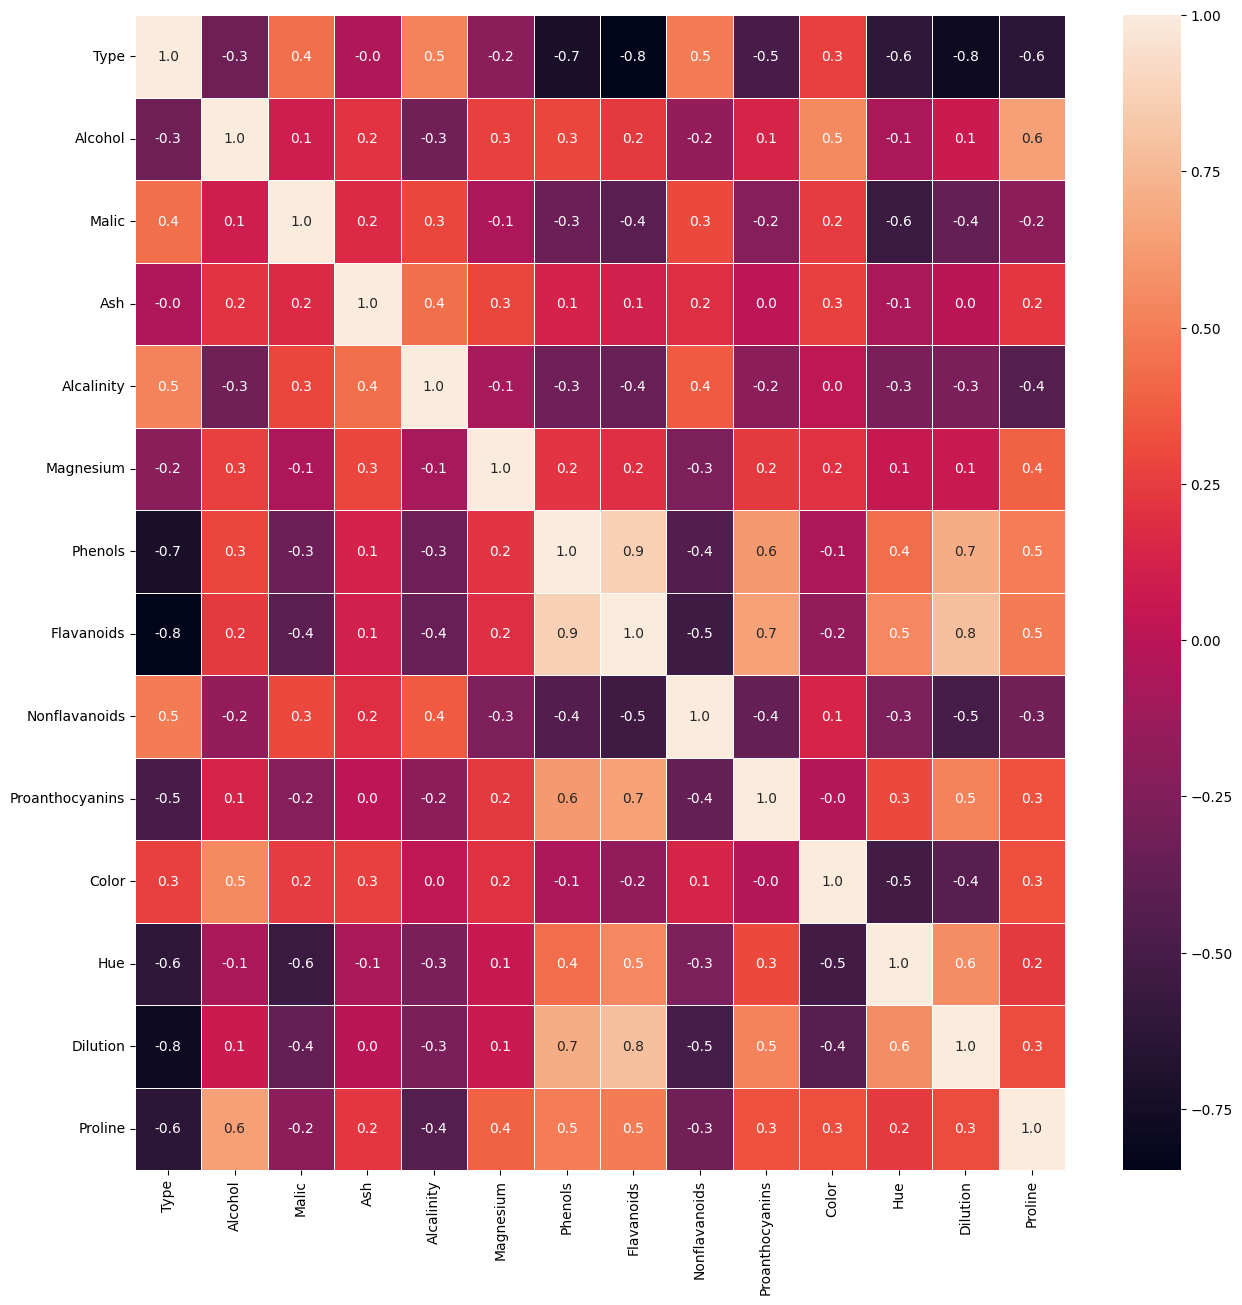

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

#Data processing

Normalization

In [17]:
minmax=MinMaxScaler()
min_norm=minmax.fit_transform(wine)
min_norm

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [18]:
scaler= StandardScaler()
standard=scaler.fit_transform(wine)
standard

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#PCA for normalized data

In [19]:
pca= PCA()
pca_value=pca.fit_transform(min_norm)
pca_value

array([[-0.84760416, -0.24314632,  0.02975173, ..., -0.04750287,
         0.04539759,  0.03138463],
       [-0.6786508 , -0.00571174, -0.28396974, ..., -0.07880283,
         0.05536931,  0.02540946],
       [-0.70037223, -0.18386807,  0.19745712, ..., -0.03573774,
         0.07481563, -0.01220164],
       ...,
       [ 0.82065832, -0.55246914, -0.02074951, ..., -0.10336217,
        -0.11764654, -0.00172363],
       [ 0.77726837, -0.4302553 , -0.09551105, ..., -0.01389598,
        -0.03257465,  0.01620368],
       [ 0.8758746 , -0.52183358,  0.28745683, ...,  0.02991871,
         0.00410332, -0.07390275]])

In [20]:
var= pca.explained_variance_ratio_
var

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412, 0.00494429])

Variance captured by

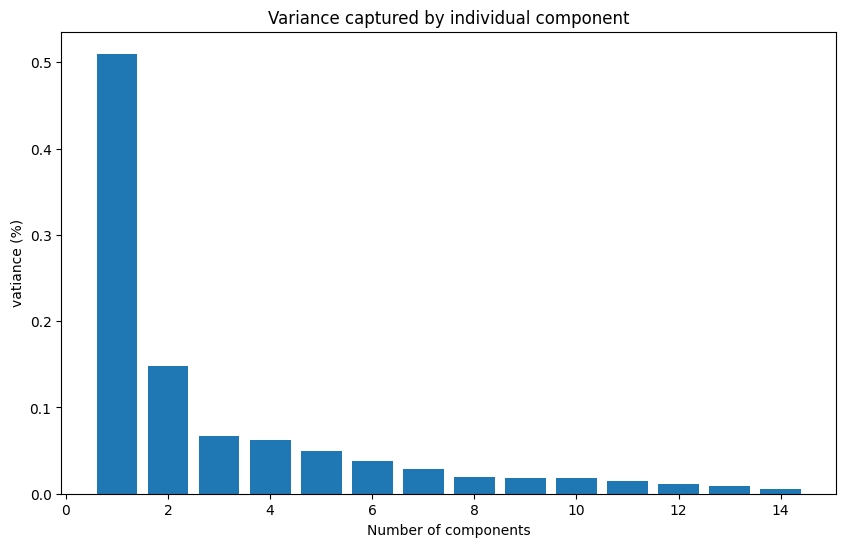

In [21]:
plt.figure(figsize=(10,6))
plt.bar(range(1,len(var)+1), var)
plt.xlabel('Number of components')
plt.ylabel('vatiance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [22]:
var1= np.cumsum(np.round(var,4)*100)
var1

array([51.  , 65.85, 72.55, 78.81, 83.82, 87.66, 90.54, 92.5 , 94.33,
       96.1 , 97.58, 98.66, 99.5 , 99.99])

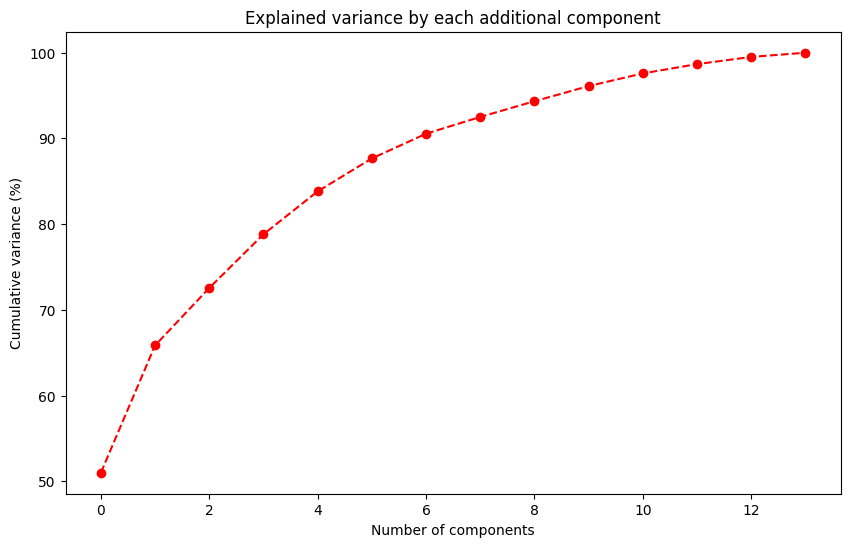

In [24]:
plt.figure(figsize=(10,6))
plt.plot(var1,color="red",linestyle='--',marker='o')
plt.xlabel('Number of components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [25]:
pca=PCA(n_components=3)
pca_value=pca.fit_transform(min_norm)
pca_value

array([[-8.47604157e-01, -2.43146319e-01,  2.97517320e-02],
       [-6.78650796e-01, -5.71173919e-03, -2.83969737e-01],
       [-7.00372235e-01, -1.83868071e-01,  1.97457120e-01],
       [-9.36075984e-01, -5.66966744e-01,  9.39186724e-02],
       [-4.54077045e-01, -6.33477143e-02,  2.86092048e-01],
       [-7.76939473e-01, -4.80602207e-01, -8.16766386e-02],
       [-7.28890640e-01, -2.95579430e-01, -1.12514825e-01],
       [-6.75292365e-01, -2.95566897e-01, -1.39489615e-02],
       [-6.90985736e-01, -3.03638910e-01, -2.34859068e-01],
       [-7.82069689e-01, -1.97958114e-01, -1.06020987e-01],
       [-8.65905159e-01, -3.45985665e-01, -4.57555248e-02],
       [-5.95351505e-01, -2.25308491e-01, -2.97683698e-01],
       [-6.51638553e-01, -2.29723700e-01, -1.78093164e-01],
       [-7.94438621e-01, -3.48487170e-01, -1.00092289e-01],
       [-9.52372705e-01, -5.24594574e-01, -1.11105793e-01],
       [-6.69525434e-01, -3.34299325e-01, -8.37164255e-02],
       [-6.33418157e-01, -4.48567906e-01

In [26]:
var=pca.explained_variance_ratio_
var

array([0.51003634, 0.14853339, 0.06702619])

In [27]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([51.  , 65.85, 72.55])

In [28]:
wine_norm_pca= pd.DataFrame(data=pca_value, columns=["PC1","PC2","PC3"])
wine_norm_pca

,PC1,PC2,PC3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


PCA for standardized data

In [29]:
pca=PCA()
pca_values=pca.fit_transform(standard)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [30]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [31]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

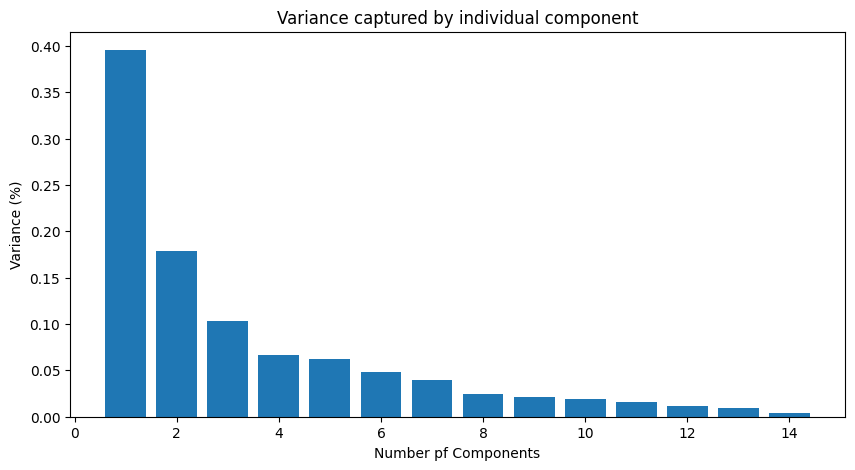

In [32]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1, len(var)+1), var)

plt.xlabel('Number pf Components')
plt.ylabel('Variance (%)')
plt.title('Variance captured by individual component')
plt.show()

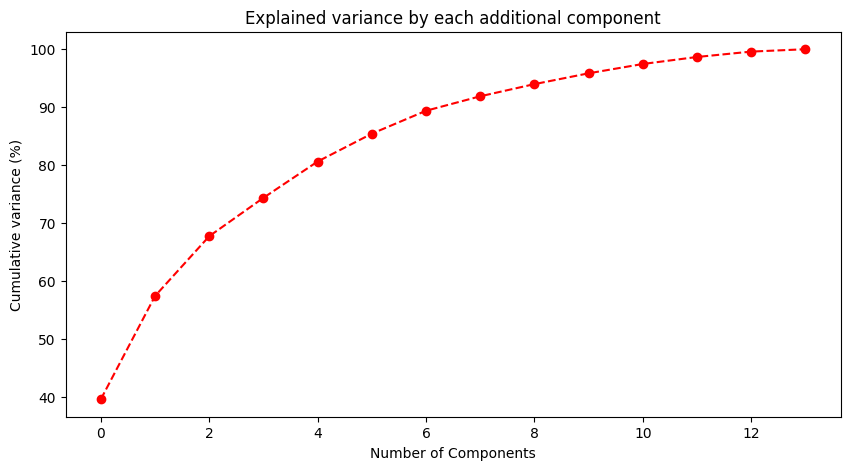

In [33]:
#Commulative Variance plot
plt.figure(figsize=(10,5))
plt.plot(var1,color="red",linestyle='--',marker='o')

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [34]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(standard)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

In [35]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102])

In [36]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([39.54, 57.38, 67.71])

In [37]:
wine_stand_pca=pd.DataFrame(data=pca_values,columns=["PC1","PC2","PC3"])
wine_stand_pca

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


#Clustering

Hierarchical Clustering

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score as sil

For normalised data

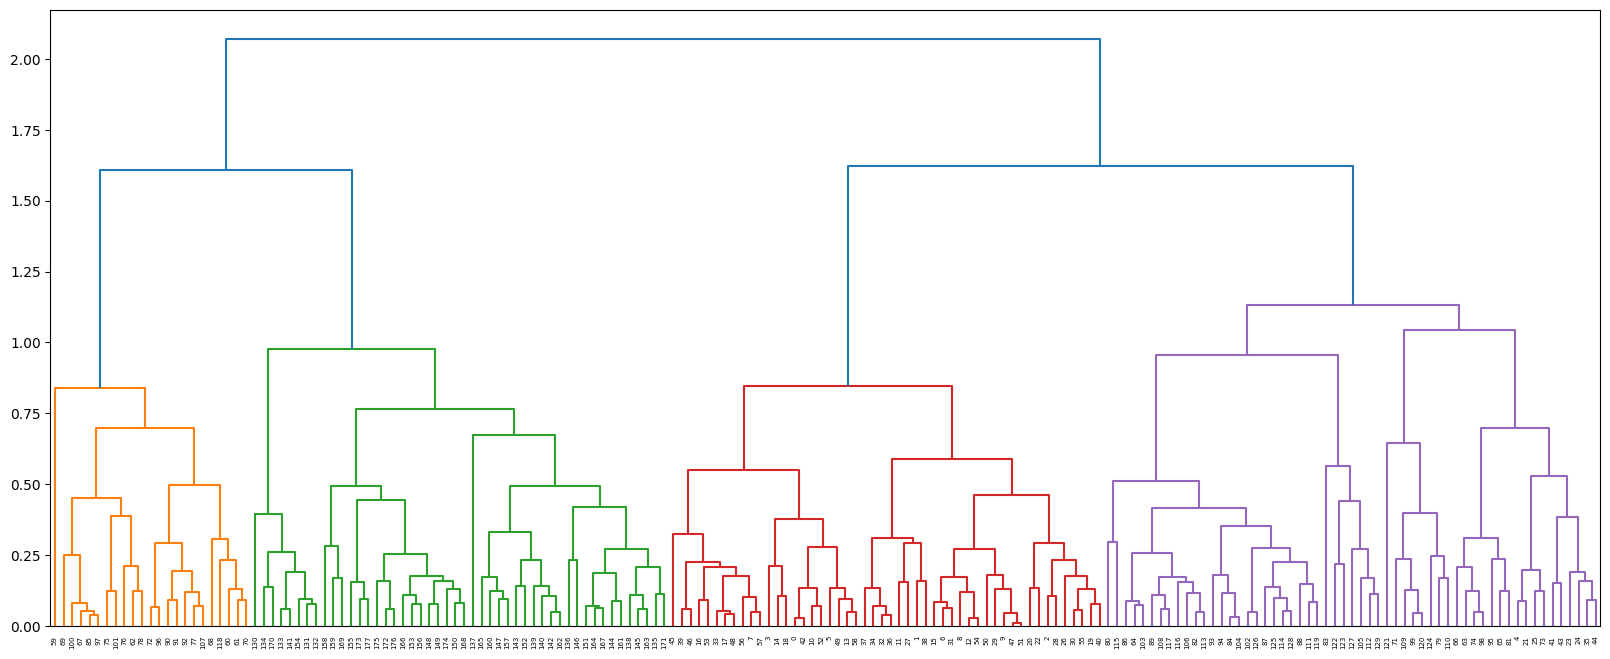

In [39]:
from seaborn.matrix import dendrogram
plt.figure(figsize=(20,8))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca, method="complete"))

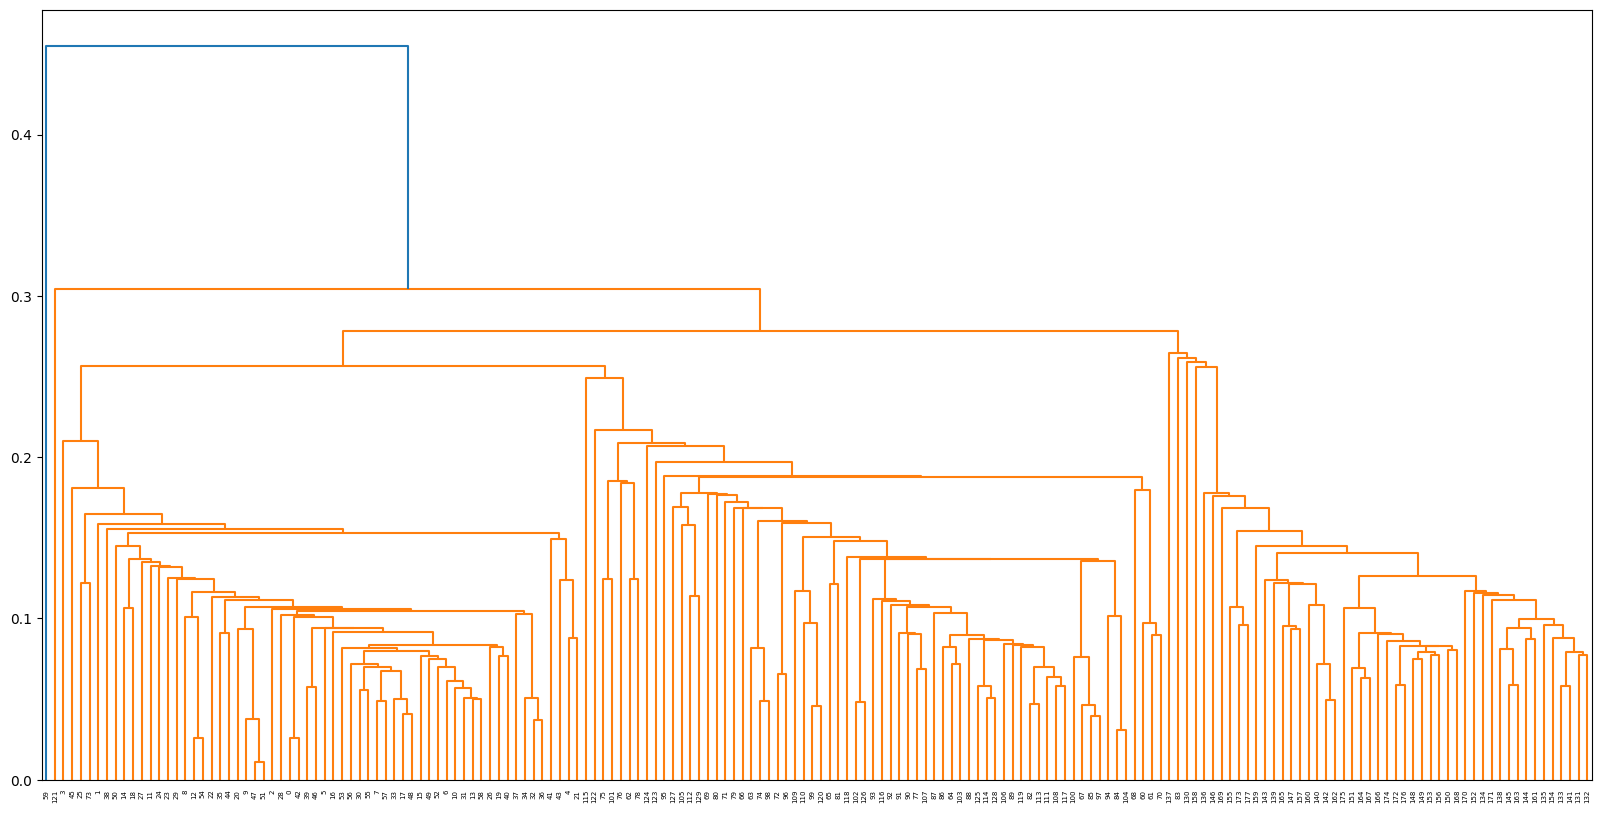

In [40]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca, method="single"))

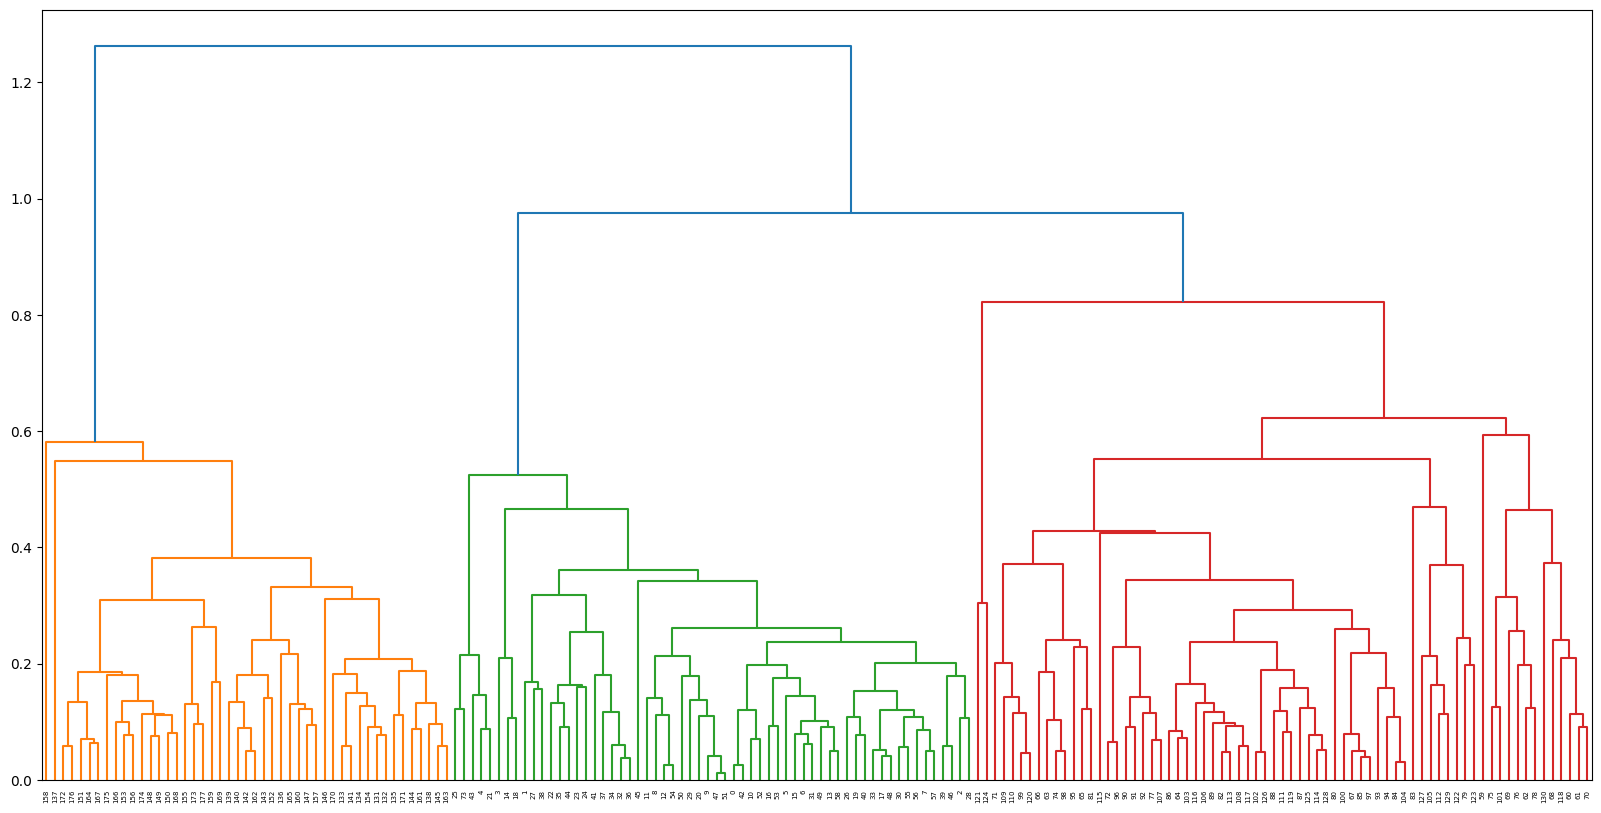

In [41]:
plt.figure(figsize=(20,10))
dendrogram= sch.dendrogram(sch.linkage(wine_norm_pca, method="average"))

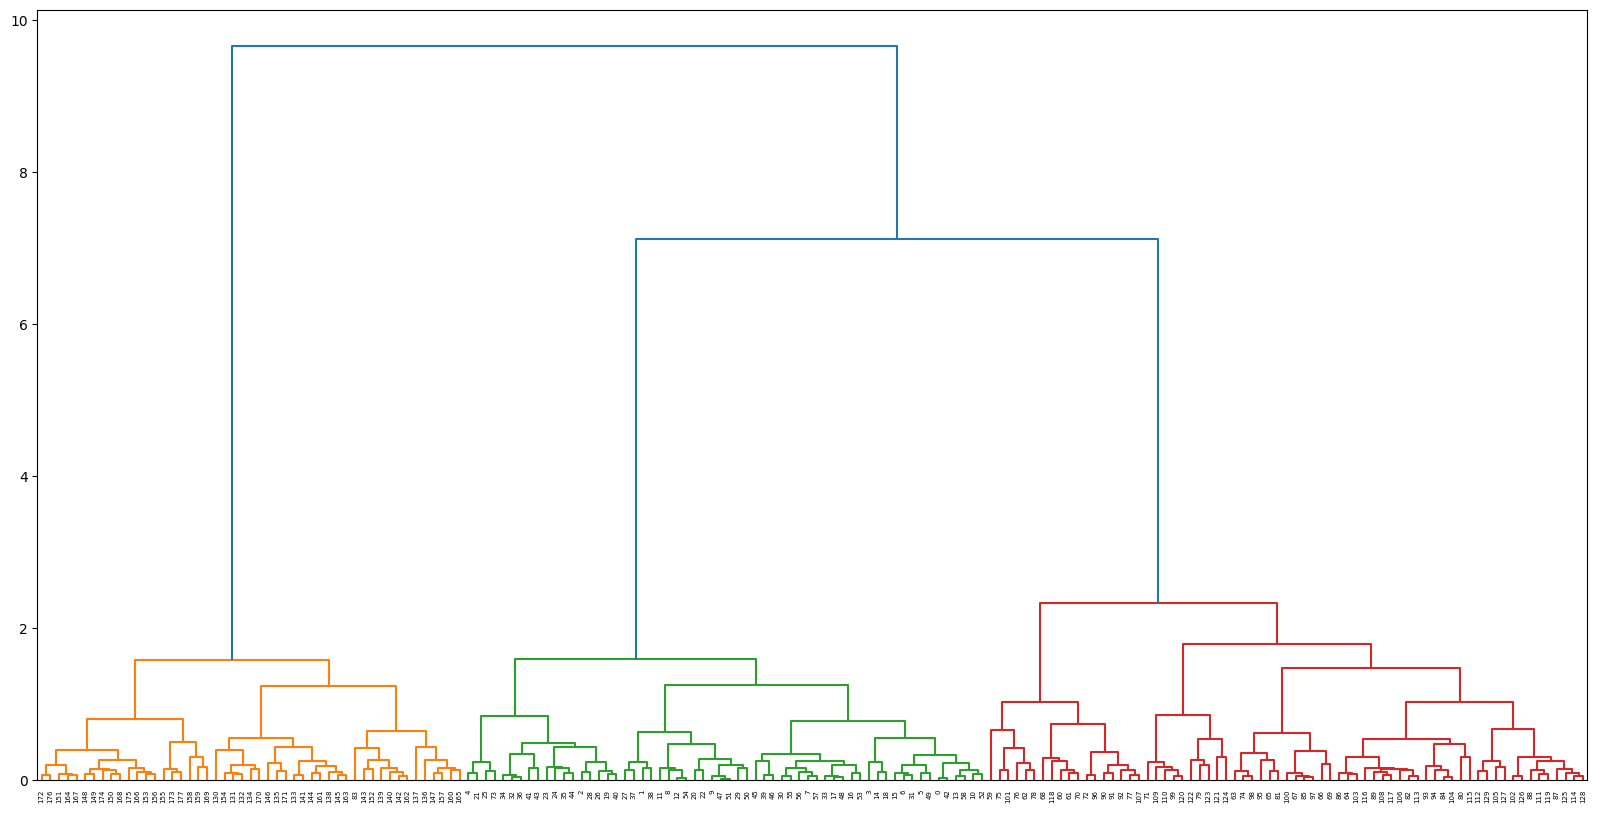

In [42]:
plt.figure(figsize=(20,10))
dendrogram= sch.dendrogram(sch.linkage(wine_norm_pca, method="ward"))

In [46]:
linkage=["single","complete","average","ward"]
for i in range(2,6):
  for x in linkage:
    hc=AgglomerativeClustering(n_clusters=i, linkage=x)
    y_hc=hc.fit_predict(wine_stand_pca)
    sil_score=sil(wine_stand_pca, y_hc)
    print("for n=",i," and linkage =",x,"Silhouette score is=",np.round(sil_score,4))

for n= 2  and linkage = single Silhouette score is= 0.3428
for n= 2  and linkage = complete Silhouette score is= 0.3286
for n= 2  and linkage = average Silhouette score is= 0.3428
for n= 2  and linkage = ward Silhouette score is= 0.4299
for n= 3  and linkage = single Silhouette score is= 0.1903
for n= 3  and linkage = complete Silhouette score is= 0.2997
for n= 3  and linkage = average Silhouette score is= 0.4118
for n= 3  and linkage = ward Silhouette score is= 0.4788
for n= 4  and linkage = single Silhouette score is= 0.1287
for n= 4  and linkage = complete Silhouette score is= 0.4225
for n= 4  and linkage = average Silhouette score is= 0.3275
for n= 4  and linkage = ward Silhouette score is= 0.4142
for n= 5  and linkage = single Silhouette score is= 0.012
for n= 5  and linkage = complete Silhouette score is= 0.426
for n= 5  and linkage = average Silhouette score is= 0.4704
for n= 5  and linkage = ward Silhouette score is= 0.42


In [49]:
#Create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters=3, linkage="ward",affinity="euclidean")
y_hc=hc.fit_predict(wine_stand_pca)

In [50]:
wine_og=pd.read_csv("wine.csv")
wine_og["cluster_id"]=y_hc
wine_og[["Type","cluster_id"]]

,Type,cluster_id
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [51]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,1.985714,12.299286,1.895571,2.222714,19.820000,93.171429,2.229429,2.028429,0.356714,1.581143,3.059286,1.053086,2.752571,527.400000
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,1.050000,13.693167,2.010833,2.477833,17.503333,108.366667,2.862500,3.022833,0.292667,1.940833,5.507833,1.064333,3.177833,1098.483333


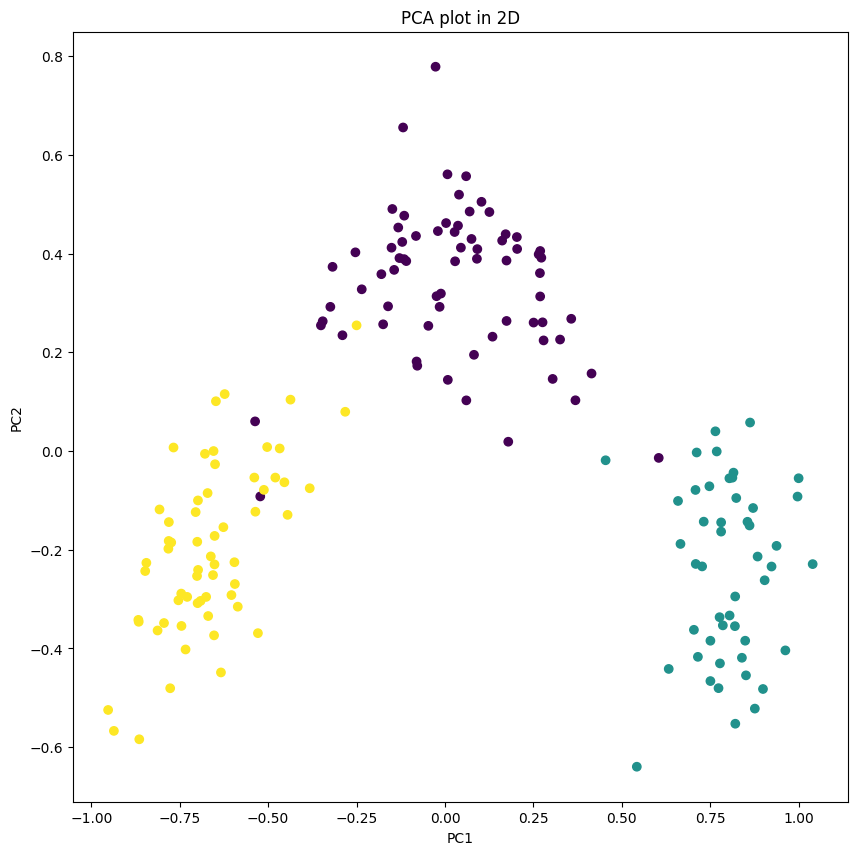

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(wine_norm_pca.iloc[:,0],wine_norm_pca.iloc[:,1],c=wine_og.cluster_id)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [53]:
wcss = []

for i in range (2,7):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(wine_stand_pca)
  wcss.append(kmeans.inertia_)

wcss

[925.0339289186143,
 491.23057091626697,
 407.34095937114876,
 355.90298402284645,
 312.84713700399425]

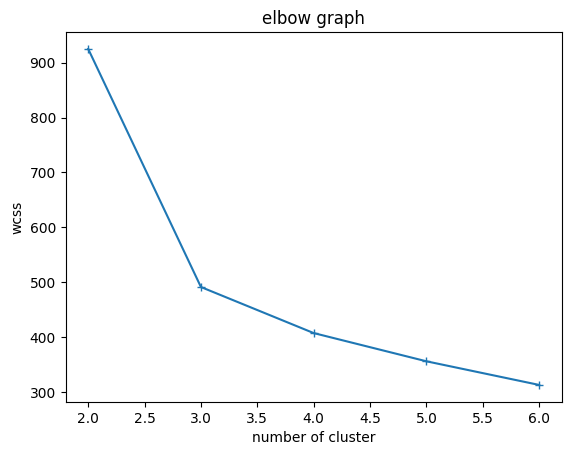

In [54]:
#Elbow graph to find best k value
plt.plot(range(2,7),wcss,marker="+")
plt.title("elbow graph")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [55]:
for i in range(2,7):
  clusters=KMeans(n_clusters=i, random_state=1)
  clusters.fit(wine_stand_pca)
  sil_score= sil(wine_stand_pca, clusters.labels_)
  print("For cluster =",i,'The si,houette score is',sil_score)

For cluster = 2 The si,houette score is 0.4204121880714805
For cluster = 3 The si,houette score is 0.4881750664935788
For cluster = 4 The si,houette score is 0.4373730550531827
For cluster = 5 The si,houette score is 0.3806488480592916
For cluster = 6 The si,houette score is 0.3789344428358446


Silhouette score is maximum (0.4532) for n_clusters =3

In [56]:
cluster=KMeans(n_clusters=3, random_state=0)
cluster.fit(wine_stand_pca)

KMeans(n_clusters=3, random_state=0)

In [59]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [60]:
wine_og["cluster_id"]=cluster.labels_
wine_og[["Type","cluster_id"]]

,Type,cluster_id
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
173,3,2
174,3,2
175,3,2
176,3,2


In [61]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [62]:
wine_og.groupby("Type").agg(["mean"])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.971831
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,2.000000


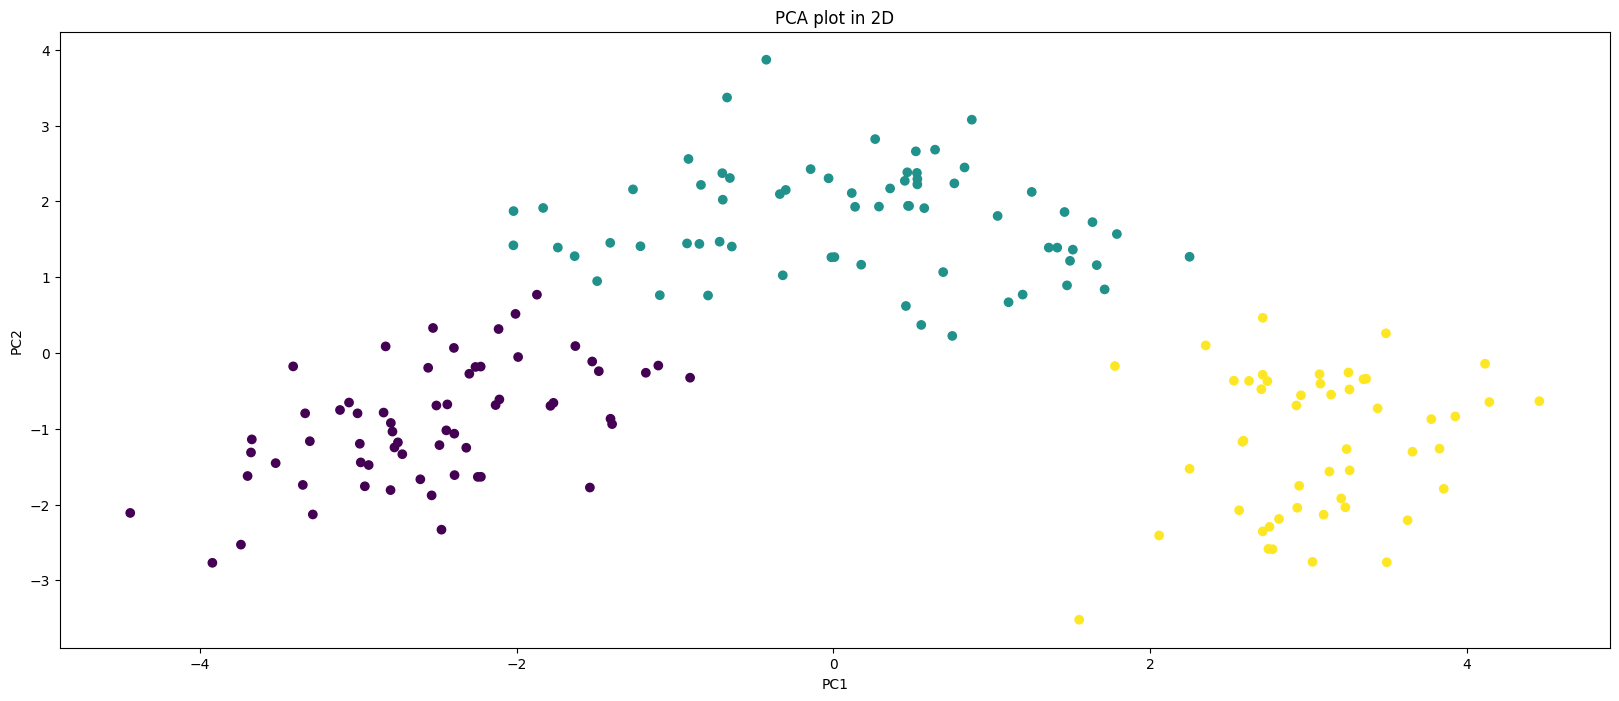

In [63]:
plt.figure(figsize=(20,8))
plt.scatter(wine_stand_pca.iloc[:,0],wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Lets visualise original clustering and clusterings made by hierarchical and k means method

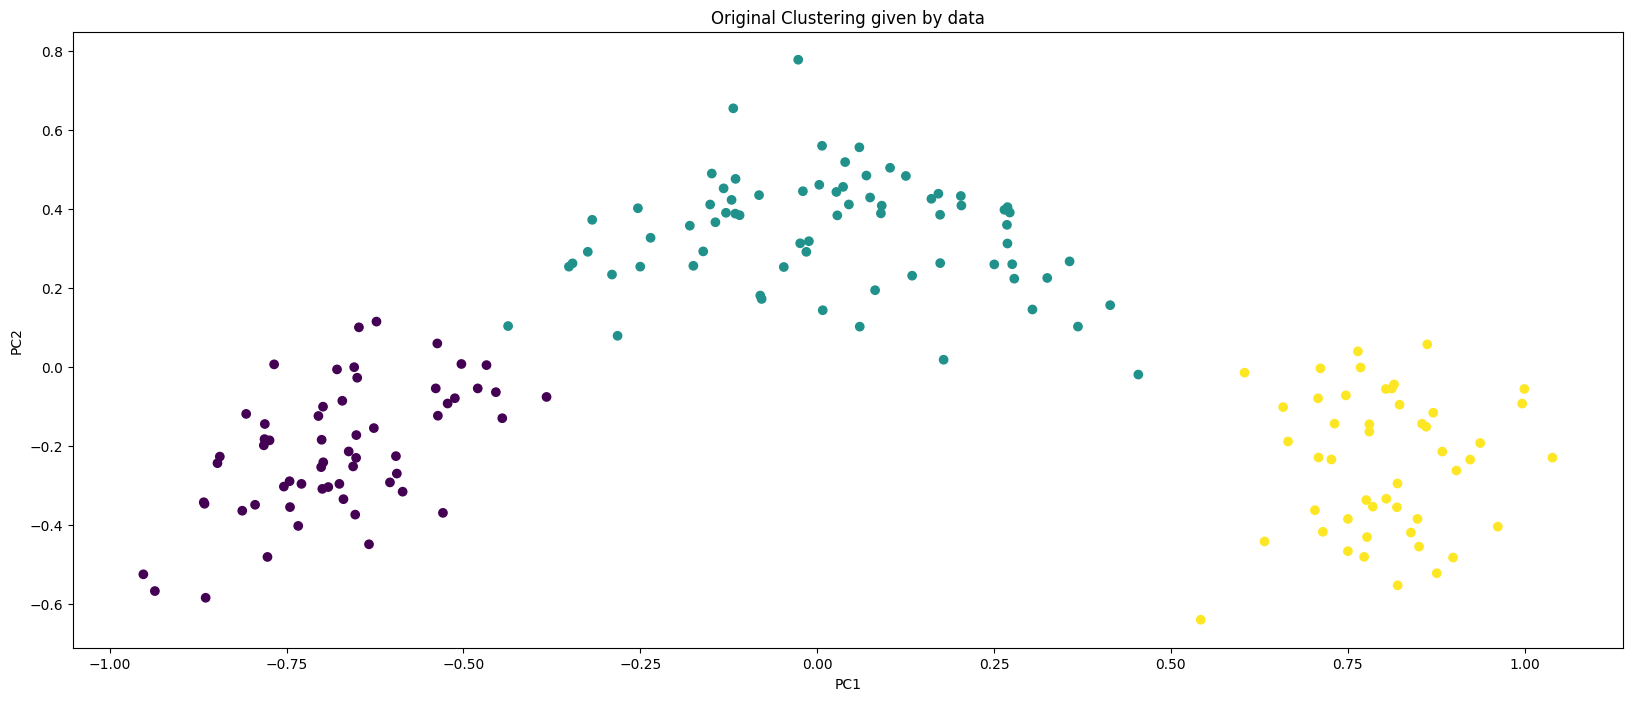

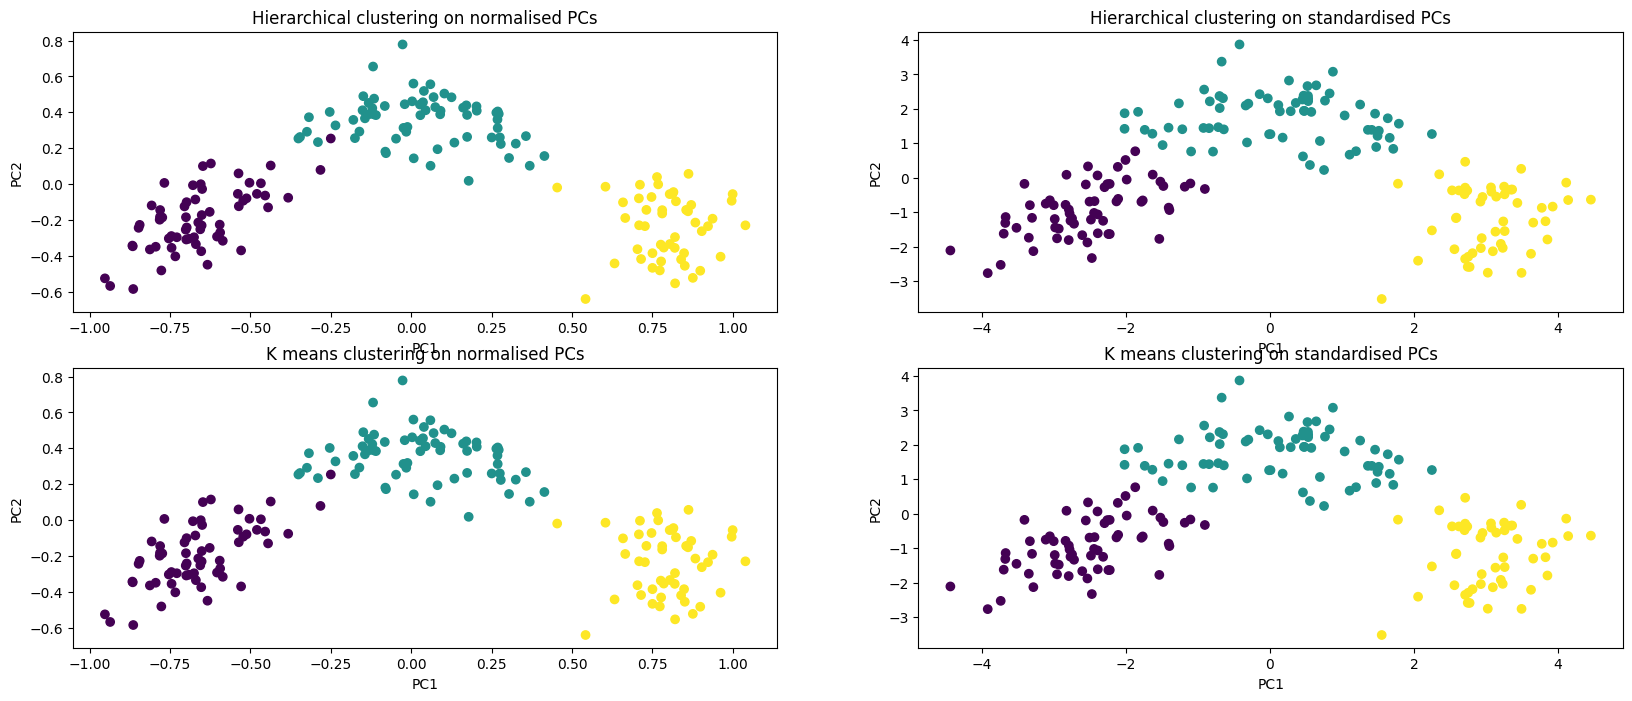

In [64]:
plt.figure(figsize=(20,8))
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.Type)
plt.title('Original Clustering given by data')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('Hierarchical clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(2,2,2)
plt.scatter(wine_stand_pca.iloc[:,0] , wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('Hierarchical clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(2,2,3)
plt.scatter(wine_norm_pca.iloc[:,0] ,wine_norm_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('K means clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,4)
plt.scatter(wine_stand_pca.iloc[:,0] ,wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('K means clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()